In [17]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
import scipy.stats as sp

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
df=pd.read_csv('tabular/tracks.csv', skipinitialspace=True)

In [19]:
df

id                                        name  \
0       4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1       6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2       56tXgHlSHCfgmGhwVXNizc                                     Routine   
3       0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4       4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   
...                        ...                                         ...   
109542  0wiDjWz3U1WfwXSrWHXe2b     I'm Good (Blue) - REAPER Extended Remix   
109543  46n9OJc7LOIVdj8t2l5WA5                            End Of The Night   
109544  127uq83uGFapbddqiMUKky                     Sexy Bitch (feat. Akon)   
109545  0ZdUHFxifUJNqo7G4aJzoF                                    Savannah   
109546  0M4HcGtxIWVVH4rSNp6XhQ                                      Dejalo   

        disc_number  duration_ms  explicit  popularity  track_number  \
0                 1       290479     False          52             5   
1                 1       539229     False          45             5   
2                 1       264200     False          39             5   
3                 1       387413     False           0             6   
4                 1       248956     False           0             1   
...             ...          ...       ...         ...           ...   
109542            1       209655      True          23             2   
109543            1       205724      True          56             1   
109544            1       195853      True          80             3   
109545            1       208698     False          60             1   
109546            1       202826     False          57             5   

                               artists   album_type  \
0                               Kölsch        album   
1                              Kiasmos        album   
2                      Joris Delacroix        album   
3               Pan-Pot;Anfisa Letyago       single   
4                Kollektiv Turmstrasse  compilation   
...                                ...          ...   
109542  David Guetta;Bebe Rexha;REAPER       single   
109543                     Danny Avila       single   
109544               David Guetta;Akon        album   
109545              Diviners;Philly K.       single   
109546                            King        album   

                            album_name  ... features_duration_ms  \
0                                 1989  ...               290479   
1                              Kiasmos  ...               539229   
2                        Night Visions  ...               264200   
3                   Confronted Remixes  ...               387414   
4                    10 Years Diynamic  ...               248957   
...                                ...  ...                  ...   
109542  I'm Good (Blue) [REAPER Remix]  ...               209655   
109543                End Of The Night  ...               205724   
109544                   One More Love  ...               195853   
109545                        Savannah  ...               208698   
109546                  Champagne Talk  ...               202826   

       time_signature  start_of_fade_out  tempo_confidence  \
0                   3          275.90530             0.020   
1                   4          517.28253             0.678   
2                   3          259.04180             0.847   
3                   4          387.41360             0.882   
4                   4          239.63574             0.882   
...               ...                ...               ...   
109542              4          200.10376             0.729   
109543              4          200.98611             0.712   
109544              4          189.48643             0.814   
109545              4          197.41605             0.650   
109546              4          196.73688             0.428   

   

In [20]:
len(df)

109547

In [21]:
df=df.drop_duplicates()

In [22]:
len(df)

109149

In [23]:
df.columns

Index(['id', 'name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 'genre'],
      dtype='object')

In [24]:
len(df['genre'].unique())

114

In [25]:
list(df['genre'].unique())

['minimal-techno',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie-pop',
 'indie',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'sleep',
 'songwriter',
 'soul',
 'spanish',
 'study',
 'swedish',
 'synth-pop',
 'tango',
 'techno',
 'trance',
 'trip-hop',
 'turkish',
 'world-music',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'acoustic',
 'afrobeat',
 'alt-rock',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'mandopop',
 'metal',
 'metalcore',
 'pop-film',
 'pop',
 'power-pop',
 'progressive-house',
 'psych-rock',
 'punk-rock',
 'punk',
 'r-n-b',
 'reggae',
 'reggaeton',
 'rock-n-roll',
 'rock',
 'rockabilly',
 'romance',
 'sad',
 'salsa',
 'samba',
 'sertanejo',
 'show-tunes',


In [26]:
df.dtypes

id                               object
name                             object
disc_number                       int64
duration_ms                       int64
explicit                           bool
popularity                        int64
track_number                      int64
artists                          object
album_type                       object
album_name                       object
album_release_date               object
album_release_date_precision     object
album_total_tracks                int64
danceability                    float64
energy                          float64
key                               int64
loudness                        float64
mode                              int64
speechiness                     float64
acousticness                    float64
instrumentalness                float64
liveness                        float64
valence                         float64
tempo                           float64
features_duration_ms              int64


In [27]:
cosine_similarity_result = 1 - cosine(df['duration_ms'], df['features_duration_ms'])

In [28]:
cosine_similarity_result

0.9999901264636738

In [29]:
cosine_similarity_result_2 = 1 - cosine(df['n_bars'], df['n_beats'])

In [30]:
cosine_similarity_result_2

0.9960159868597221

In [31]:
cosine_similarity_result_3 = 1 - cosine(df['start_of_fade_out'], df['duration_ms'])

In [32]:
cosine_similarity_result_3

0.9997421339058116

### Eliminazione delle colonne simili

In [33]:
df=df.drop('features_duration_ms', axis=1)
df=df.drop('n_beats', axis=1)
df=df.drop('start_of_fade_out', axis=1)

In [34]:
df.columns

Index(['id', 'name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_bars', 'genre'],
      dtype='object')

## Valori nulli

In [35]:
print(df.isnull().any())

id                              False
name                            False
disc_number                     False
duration_ms                     False
explicit                        False
popularity                      False
track_number                    False
artists                         False
album_type                      False
album_name                      False
album_release_date              False
album_release_date_precision    False
album_total_tracks              False
danceability                    False
energy                          False
key                             False
loudness                        False
mode                            False
speechiness                     False
acousticness                    False
instrumentalness                False
liveness                        False
valence                         False
tempo                           False
time_signature                  False
tempo_confidence                False
time_signatu

## Conversione float

## Da millisecondi a secondi

In [36]:
df[['duration_ms']]

duration_ms
0            290479
1            539229
2            264200
3            387413
4            248956
...             ...
109542       209655
109543       205724
109544       195853
109545       208698
109546       202826

[109149 rows x 1 columns]

In [37]:
df['duration_ms']=round(df['duration_ms']/1000, 2)

In [38]:
df[['duration_ms']]

duration_ms
0            290.48
1            539.23
2            264.20
3            387.41
4            248.96
...             ...
109542       209.66
109543       205.72
109544       195.85
109545       208.70
109546       202.83

[109149 rows x 1 columns]

In [39]:
df.dtypes

id                               object
name                             object
disc_number                       int64
duration_ms                     float64
explicit                           bool
popularity                        int64
track_number                      int64
artists                          object
album_type                       object
album_name                       object
album_release_date               object
album_release_date_precision     object
album_total_tracks                int64
danceability                    float64
energy                          float64
key                               int64
loudness                        float64
mode                              int64
speechiness                     float64
acousticness                    float64
instrumentalness                float64
liveness                        float64
valence                         float64
tempo                           float64
time_signature                    int64


In [40]:
df['disc_number']=df['disc_number'].astype(float)

In [41]:
df['popularity']=df['popularity'].astype(float)

In [42]:
df['track_number']=df['track_number'].astype(float)

In [43]:
df['album_total_tracks']=df['album_total_tracks'].astype(float)

In [44]:
df['key']=df['key'].astype(float)

In [45]:
df['time_signature']=df['time_signature'].astype(float)

In [46]:
df.dtypes

id                               object
name                             object
disc_number                     float64
duration_ms                     float64
explicit                           bool
popularity                      float64
track_number                    float64
artists                          object
album_type                       object
album_name                       object
album_release_date               object
album_release_date_precision     object
album_total_tracks              float64
danceability                    float64
energy                          float64
key                             float64
loudness                        float64
mode                              int64
speechiness                     float64
acousticness                    float64
instrumentalness                float64
liveness                        float64
valence                         float64
tempo                           float64
time_signature                  float64


In [47]:
df['mode'].unique()

array([1, 0])

In [48]:
df=round(df, 2)

In [49]:
df

id                                        name  \
0       4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1       6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2       56tXgHlSHCfgmGhwVXNizc                                     Routine   
3       0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4       4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   
...                        ...                                         ...   
109542  0wiDjWz3U1WfwXSrWHXe2b     I'm Good (Blue) - REAPER Extended Remix   
109543  46n9OJc7LOIVdj8t2l5WA5                            End Of The Night   
109544  127uq83uGFapbddqiMUKky                     Sexy Bitch (feat. Akon)   
109545  0ZdUHFxifUJNqo7G4aJzoF                                    Savannah   
109546  0M4HcGtxIWVVH4rSNp6XhQ                                      Dejalo   

        disc_number  duration_ms  explicit  popularity  track_number  \
0               1.0       290.48     False        52.0           5.0   
1               1.0       539.23     False        45.0           5.0   
2               1.0       264.20     False        39.0           5.0   
3               1.0       387.41     False         0.0           6.0   
4               1.0       248.96     False         0.0           1.0   
...             ...          ...       ...         ...           ...   
109542          1.0       209.66      True        23.0           2.0   
109543          1.0       205.72      True        56.0           1.0   
109544          1.0       195.85      True        80.0           3.0   
109545          1.0       208.70     False        60.0           1.0   
109546          1.0       202.83     False        57.0           5.0   

                               artists   album_type  \
0                               Kölsch        album   
1                              Kiasmos        album   
2                      Joris Delacroix        album   
3               Pan-Pot;Anfisa Letyago       single   
4                Kollektiv Turmstrasse  compilation   
...                                ...          ...   
109542  David Guetta;Bebe Rexha;REAPER       single   
109543                     Danny Avila       single   
109544               David Guetta;Akon        album   
109545              Diviners;Philly K.       single   
109546                            King        album   

                            album_name  ... liveness valence   tempo  \
0                                 1989  ...     0.09    0.24  186.00   
1                              Kiasmos  ...     0.11    0.14  120.02   
2                        Night Visions  ...     0.07    0.32  118.05   
3                   Confronted Remixes  ...     0.11    0.04  128.99   
4                    10 Years Diynamic  ...     0.12    0.12  120.00   
...                                ...  ...      ...     ...     ...   
109542  I'm Good (Blue) [REAPER Remix]  ...     0.36    0.37  173.96   
109543                End Of The Night  ...     0.08    0.31   99.97   
109544                   One More Love  ...     0.13    0.80  130.01   
109545                        Savannah  ...     0.04    0.39  108.07   
109546                  Champagne Talk  ...     0.14    0.56   92.08   

        time_signature  tempo_confidence  time_signature_confidence  \
0                  3.0              0.02                       1.00   
1                  4.0              0.68                       0.33   
2                  3.0              0.85                       0.46   
3                  4.0              0.88                       0.50   
4                  4.0              0.88                       1.00   
...                ...               ...                        ...   
109542             4.0              0.73                       1.00   
109543             4.0              0.71                       1.00   
109544             4.0              0.81                     

## Grafici

<AxesSubplot:>

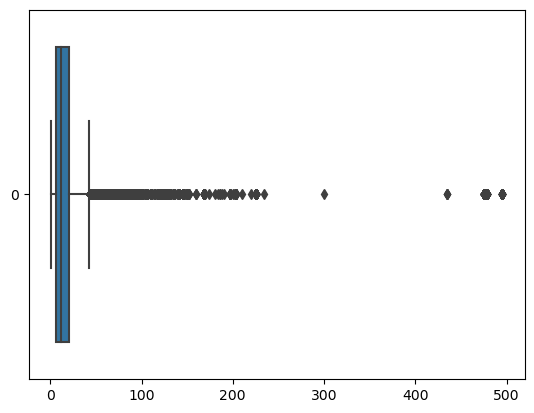

In [50]:
sns.boxplot(df["album_total_tracks"], orient="h")

<AxesSubplot:>

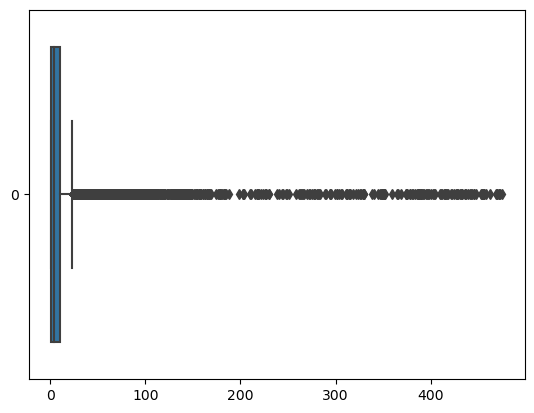

In [51]:
sns.boxplot(df["track_number"], orient="h")

<AxesSubplot:xlabel='track_number', ylabel='Count'>

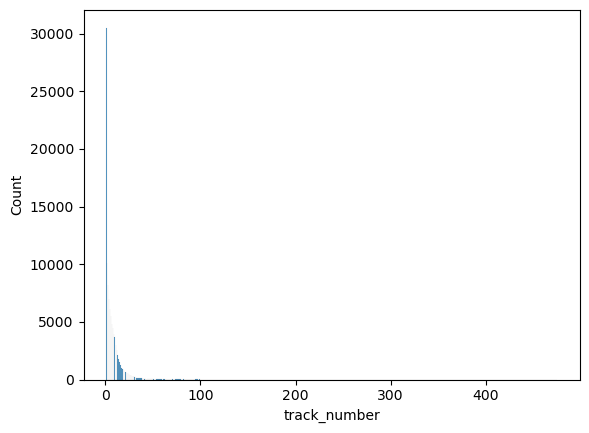

In [52]:
sns.histplot(df["track_number"])

<AxesSubplot:>

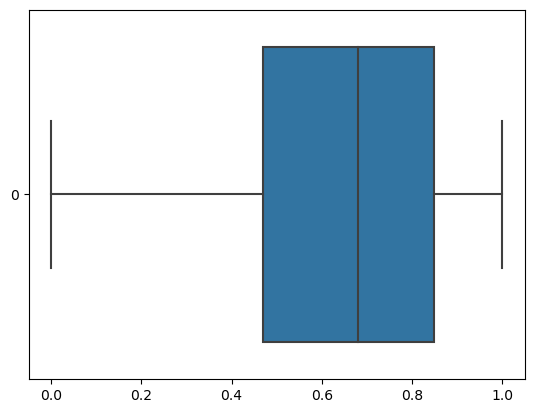

In [53]:
sns.boxplot(df["energy"], orient="h")

<AxesSubplot:xlabel='energy', ylabel='Count'>

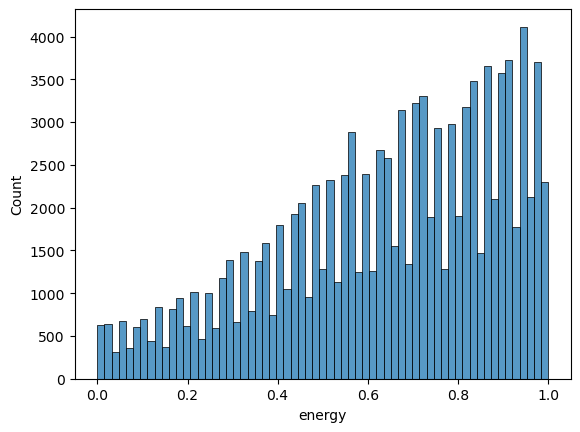

In [54]:
sns.histplot(df["energy"])

<AxesSubplot:>

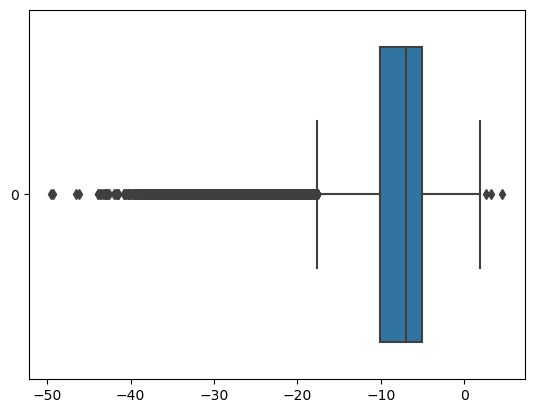

In [55]:
sns.boxplot(df["loudness"], orient="h")

<AxesSubplot:xlabel='loudness', ylabel='Count'>

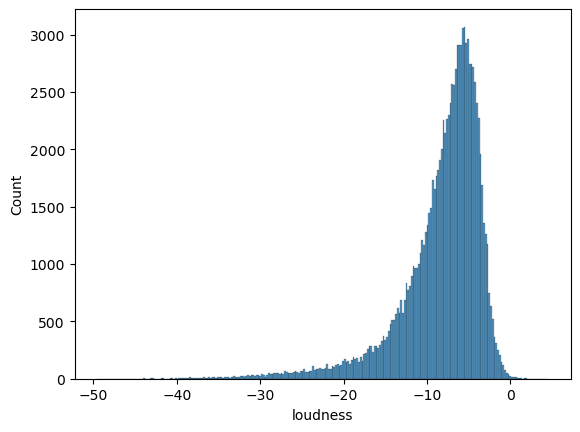

In [56]:
import seaborn as sns

# Esegui l'istogramma senza modificare le opzioni di configurazione di Pandas
sns.histplot(df["loudness"])


In [57]:
sp.skew(df["loudness"])

-2.001557752113004

# Heatamp

In [58]:
df_continui=df[['disc_number', 'duration_ms', 'popularity',
       'track_number', 'album_total_tracks', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'n_bars']]

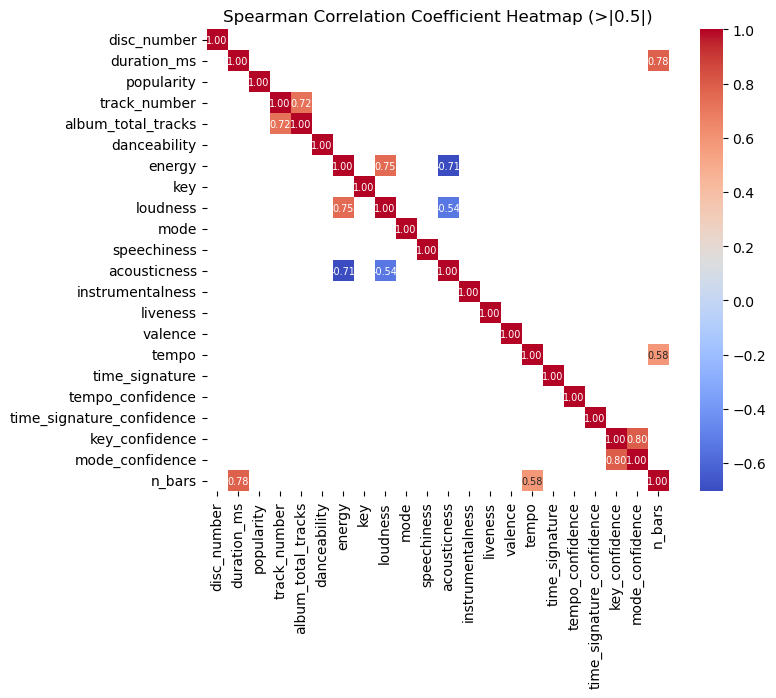

In [59]:
# Calculate the Spearman correlation coefficient matrix
corr_matrix = df_continui.corr(method='spearman')

# Filter the correlation matrix to show only correlations > 0.5 or < -0.5
corr_filtered = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_filtered, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7}, square=True)
plt.title('Spearman Correlation Coefficient Heatmap (>|0.5|)')
plt.show()

## Scatter plot

In [60]:
df_continui=df[['duration_ms', 'popularity', 'danceability', 'energy', 'loudness','speechiness', 'acousticness',  
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'tempo_confidence', 
                     'time_signature_confidence', 'key_confidence', 'mode_confidence' ]]

In [61]:
df_continui.columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence'],
      dtype='object')

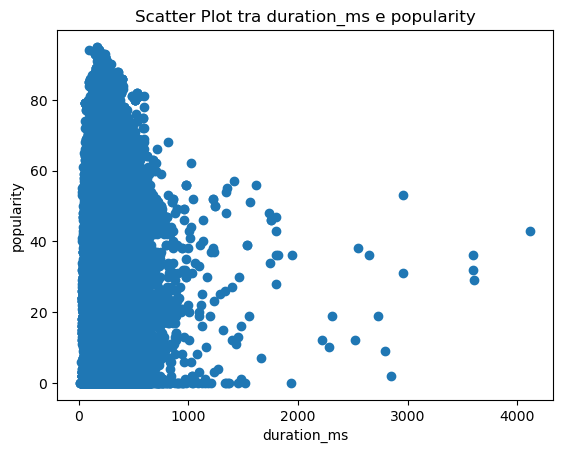

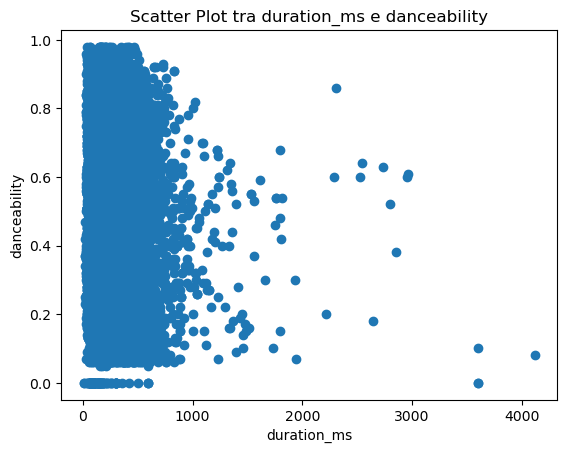

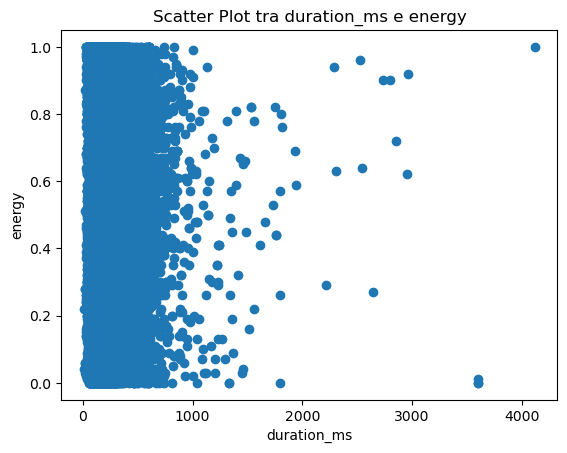

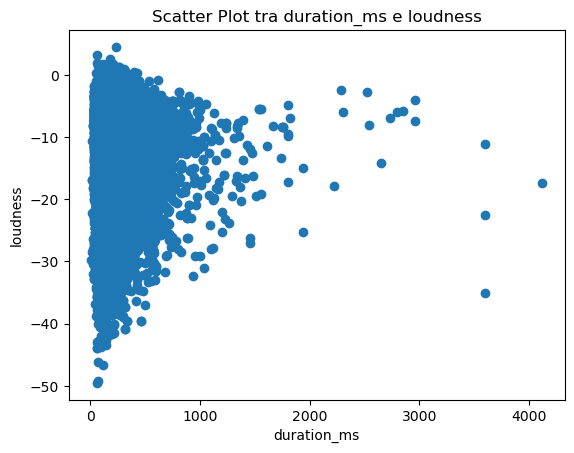

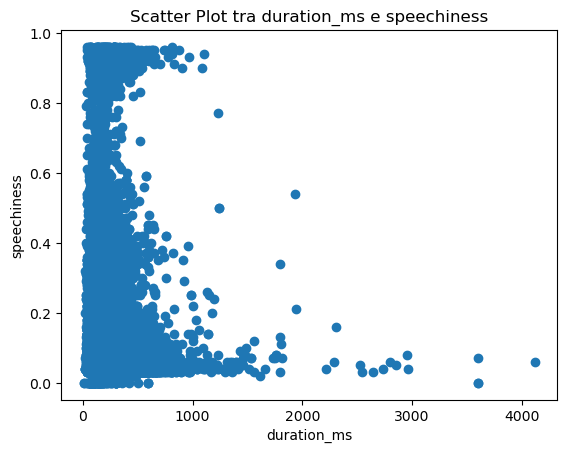

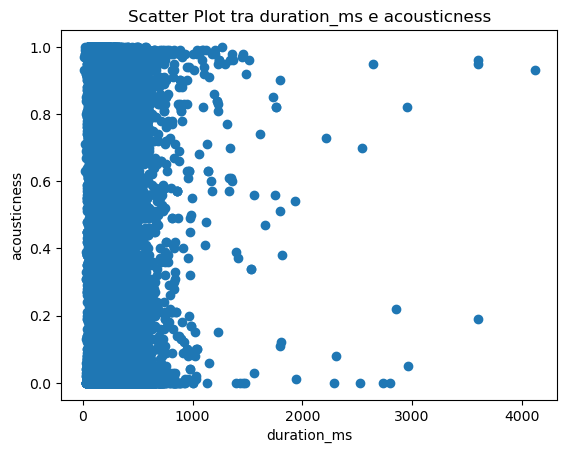

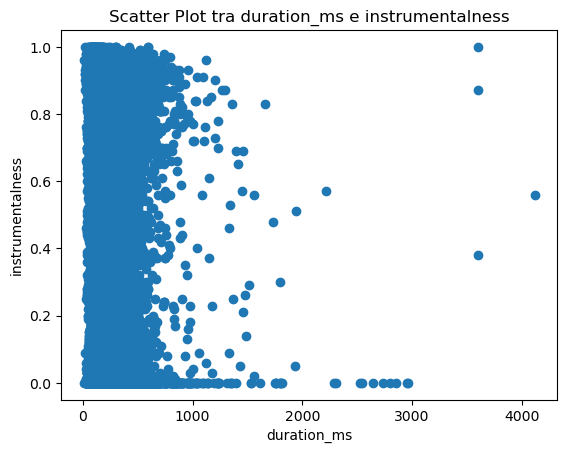

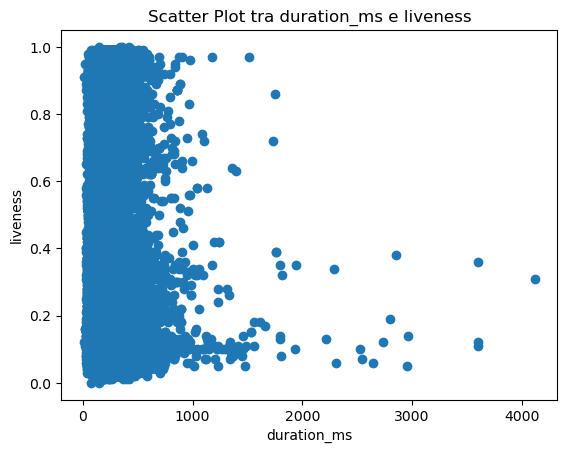

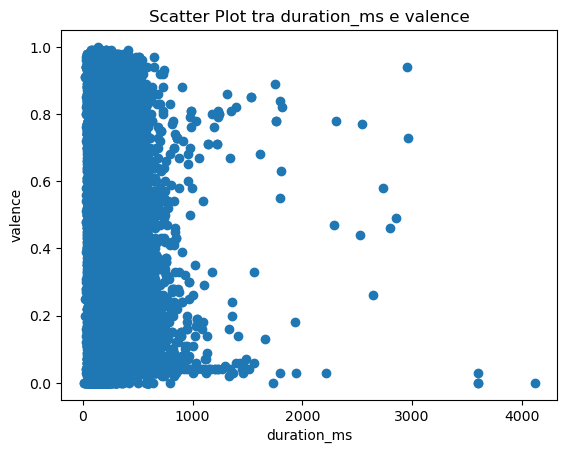

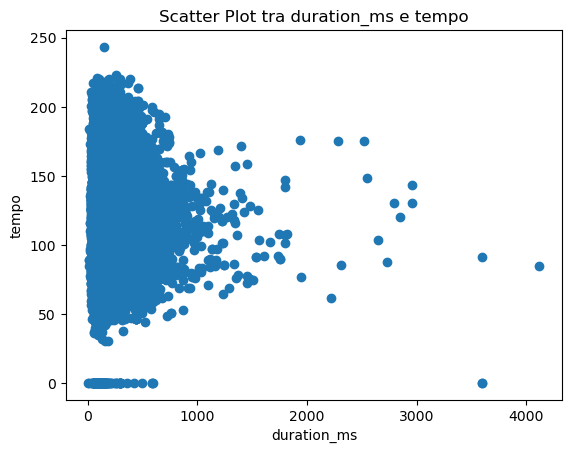

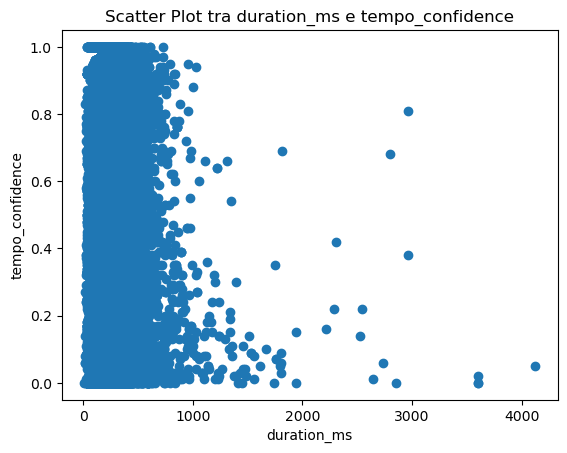

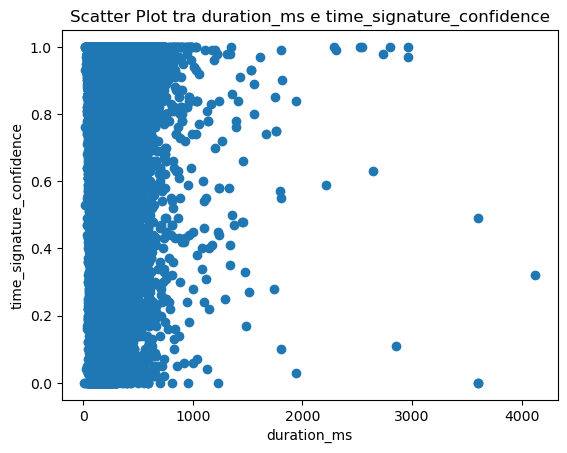

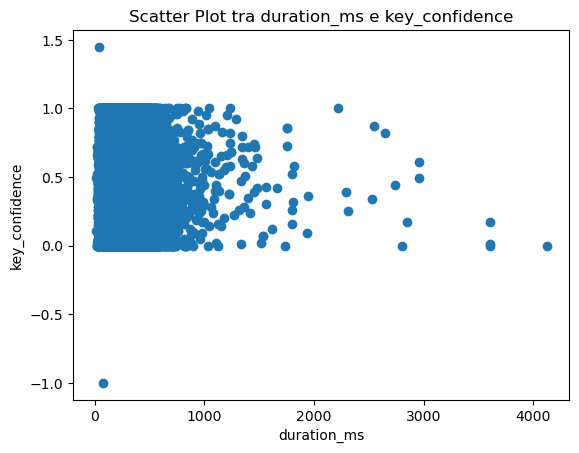

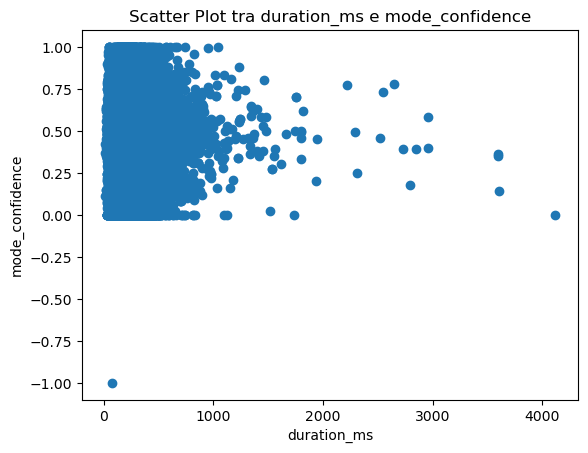

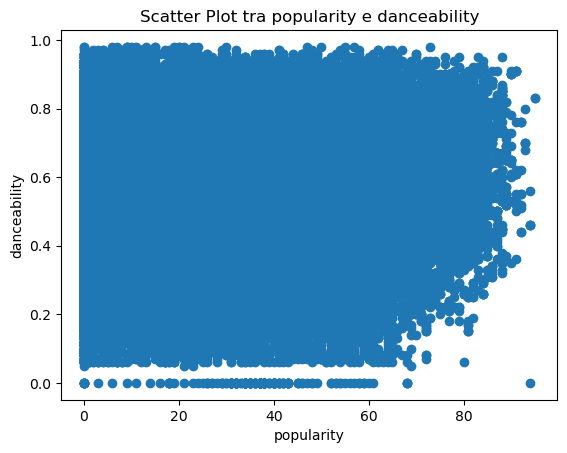

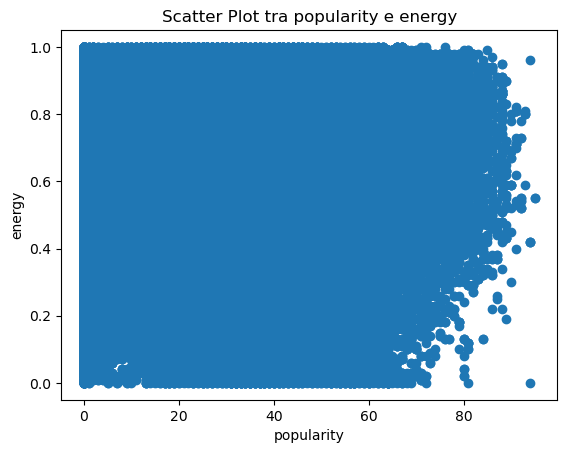

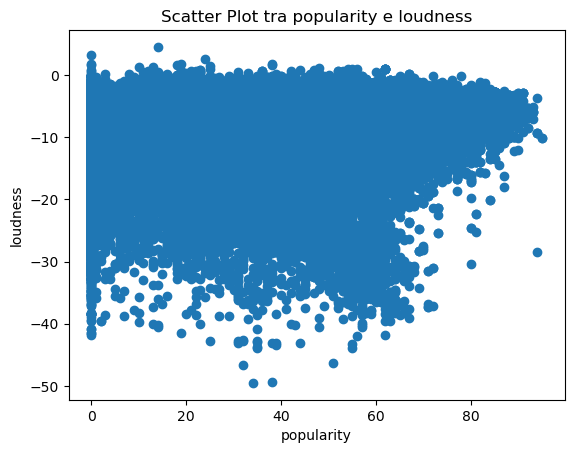

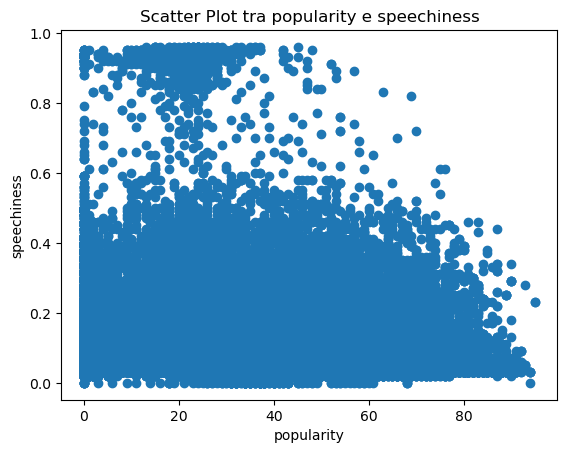

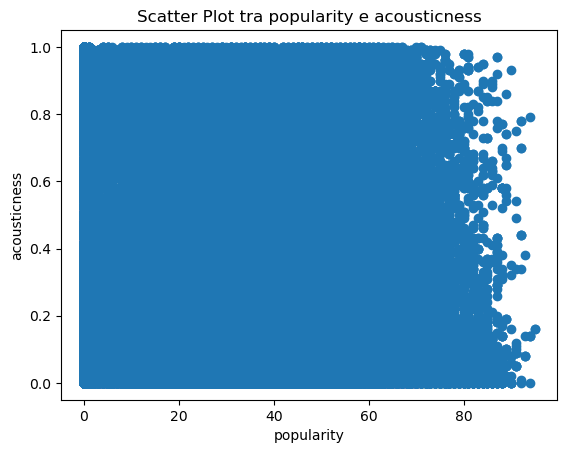

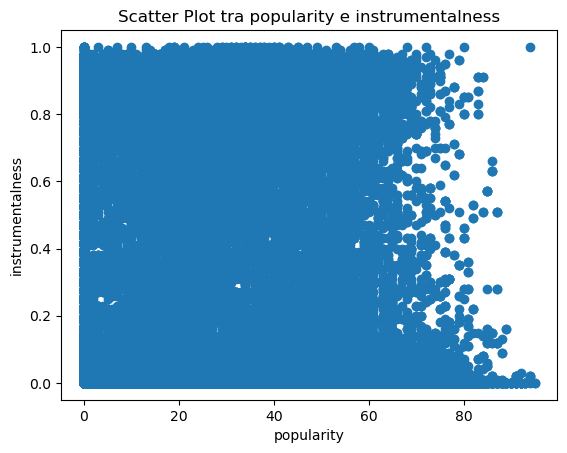

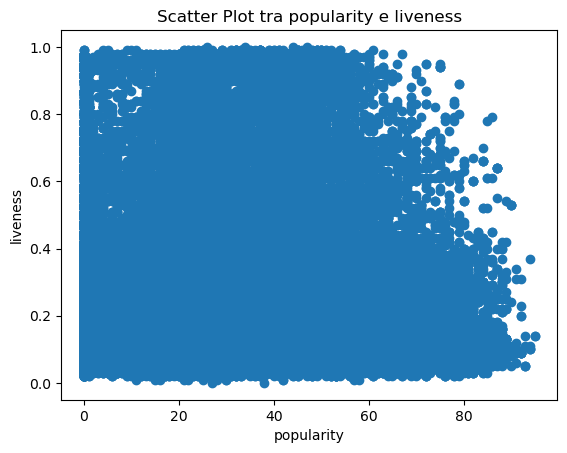

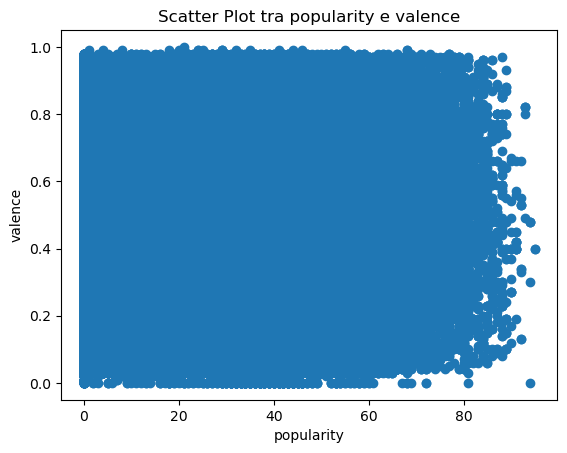

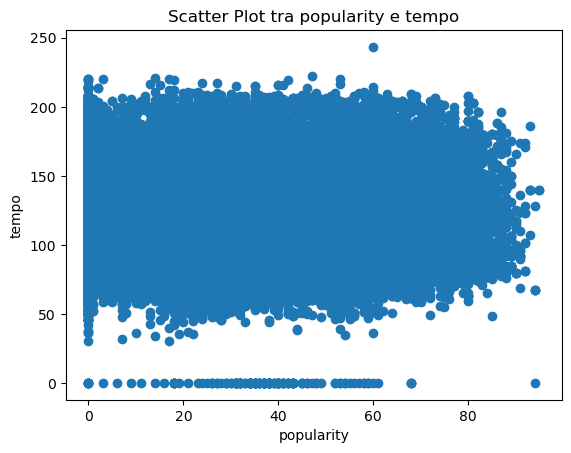

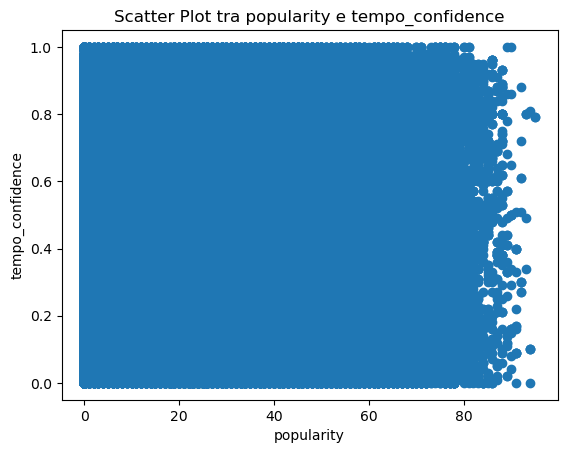

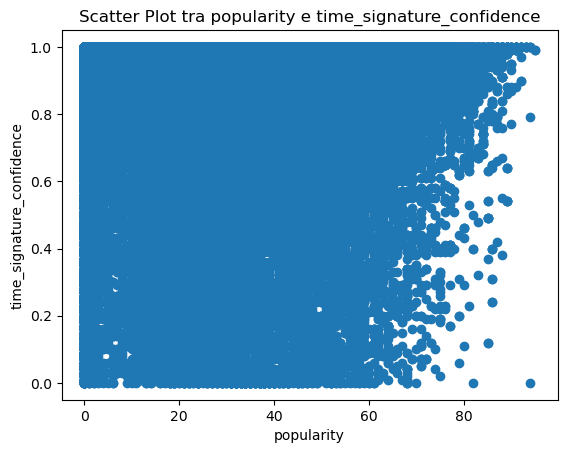

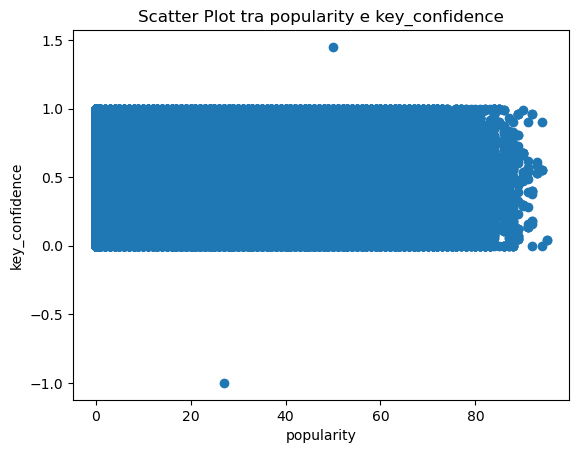

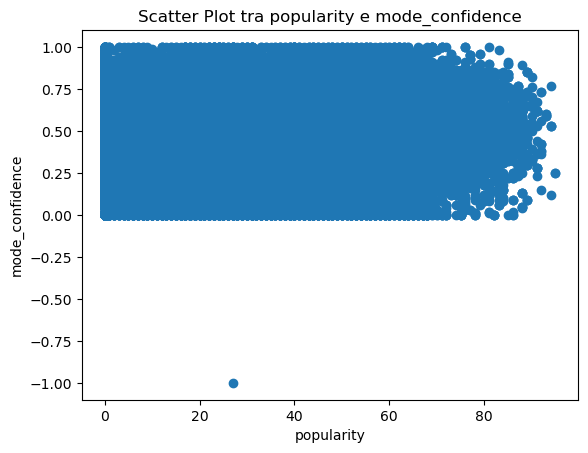

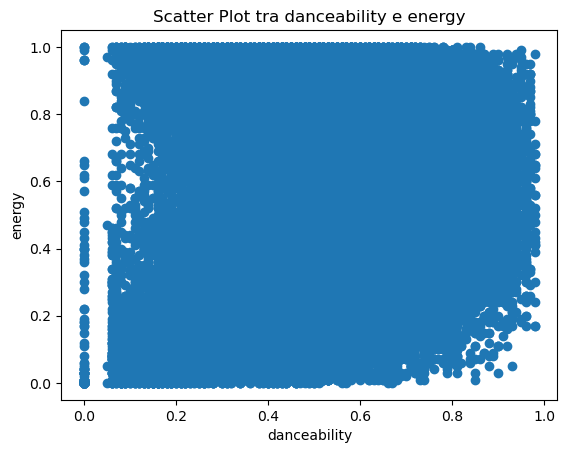

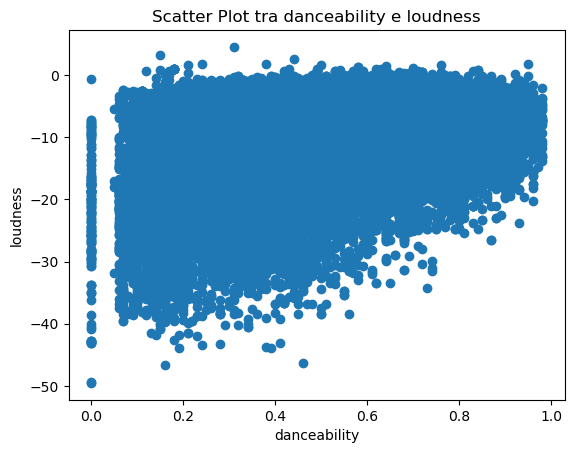

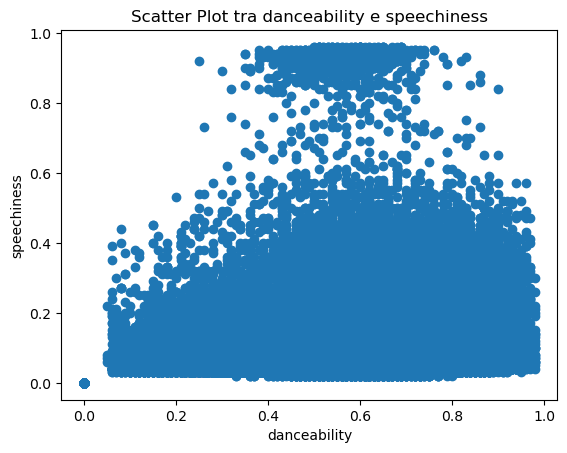

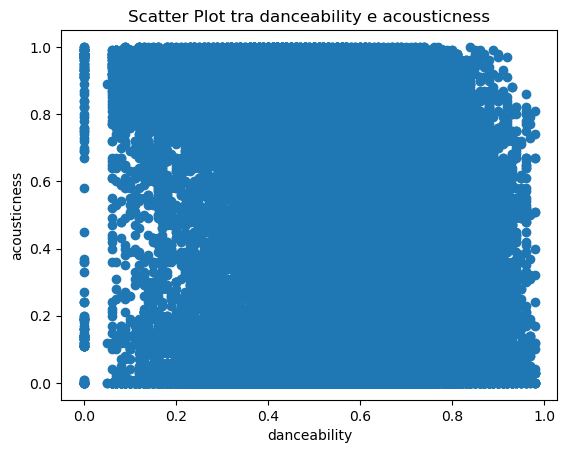

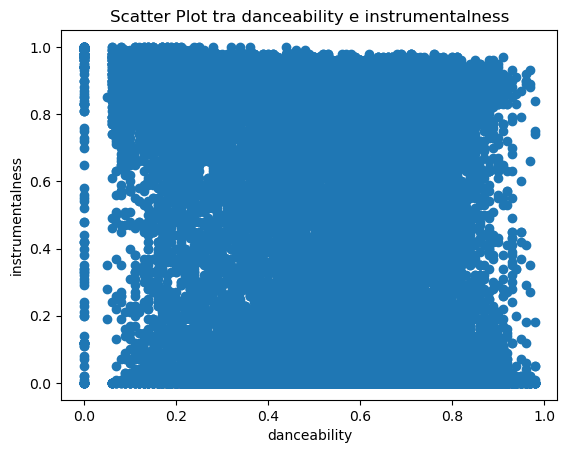

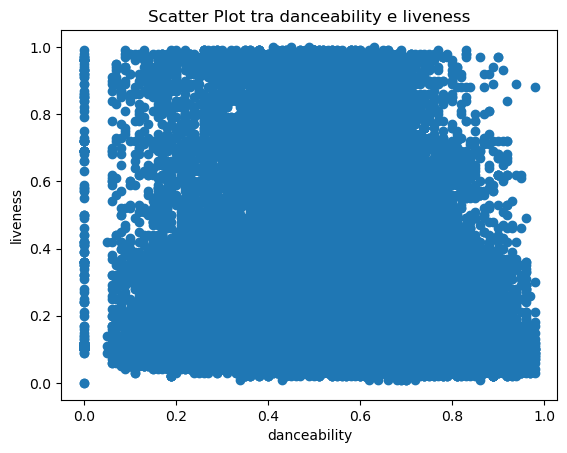

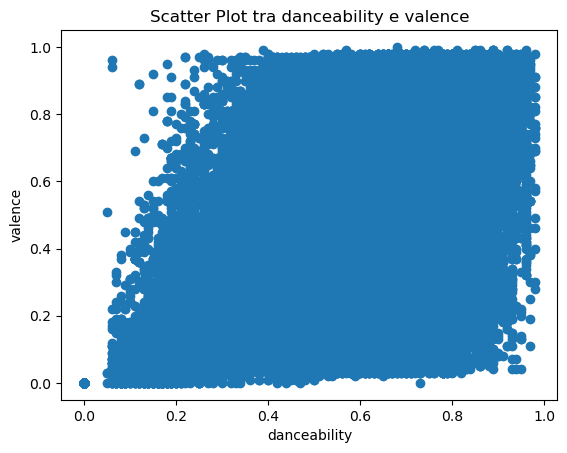

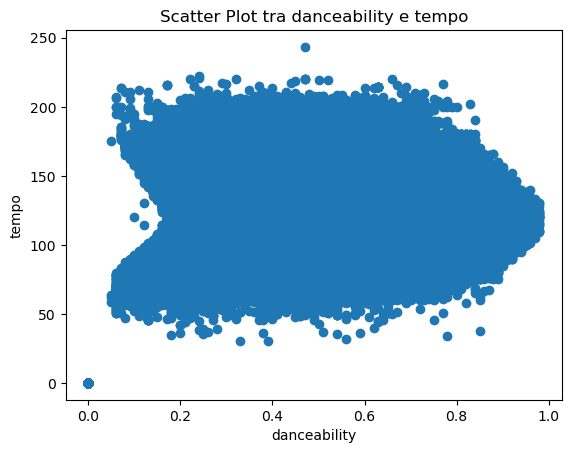

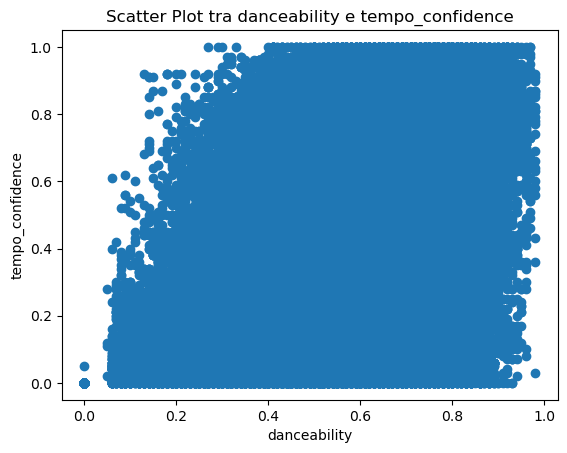

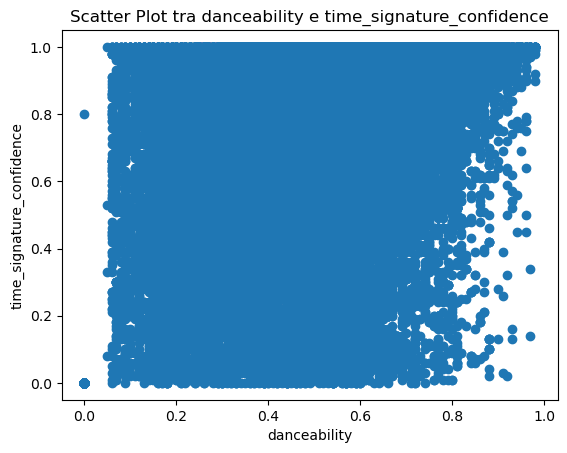

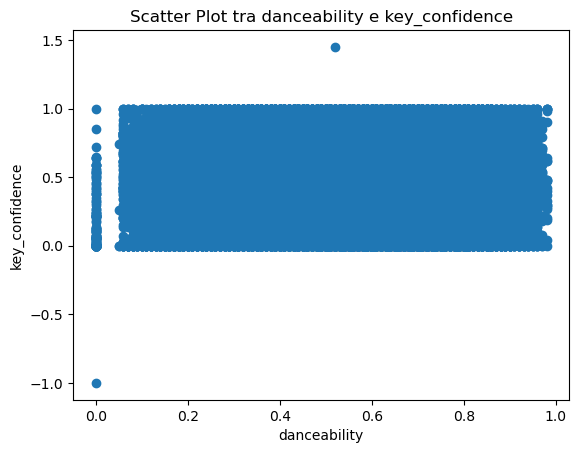

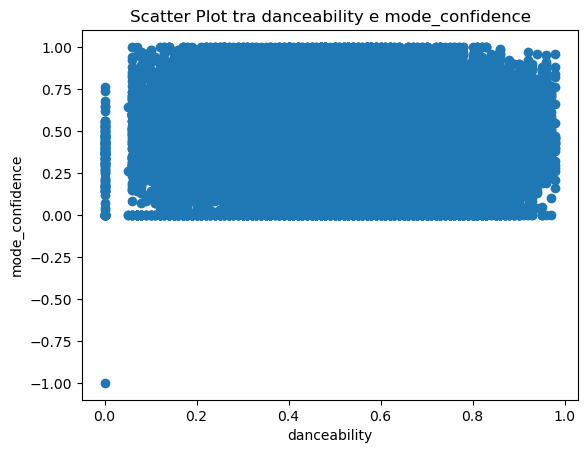

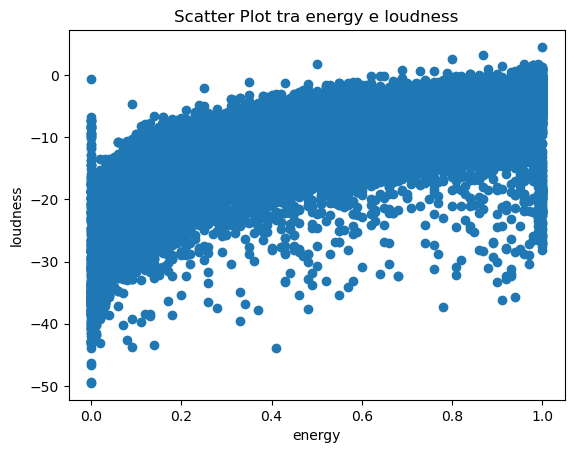

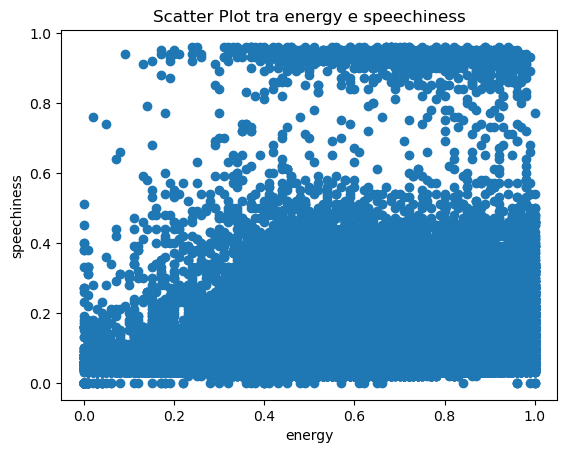

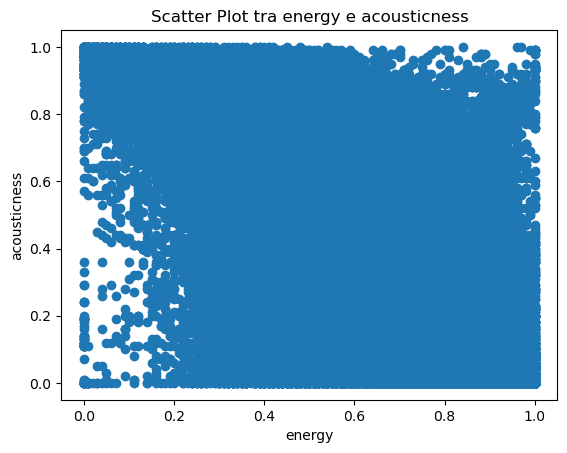

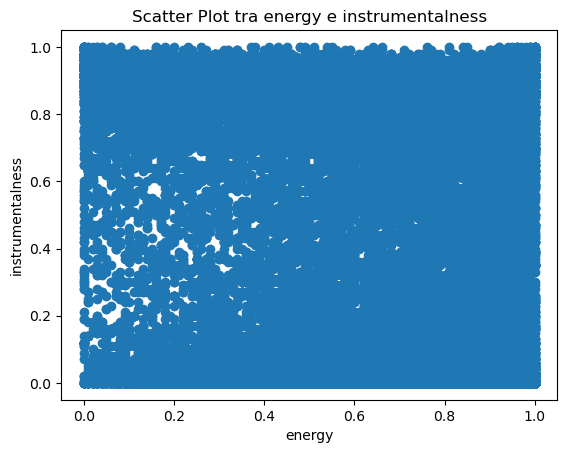

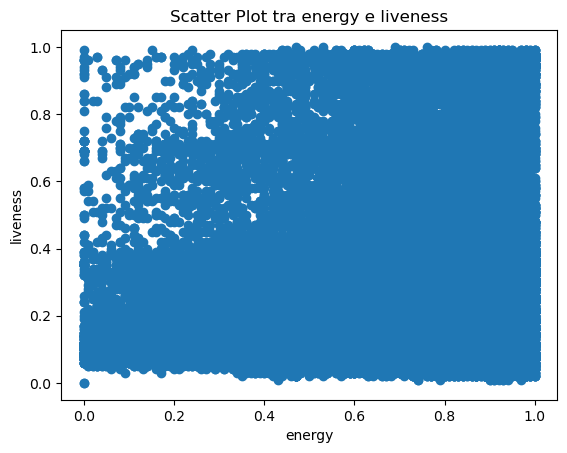

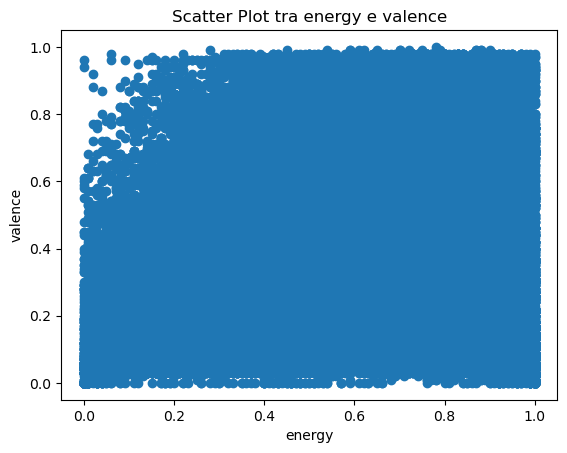

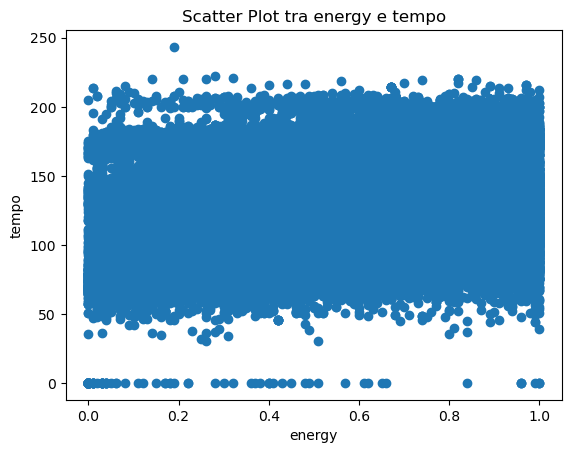

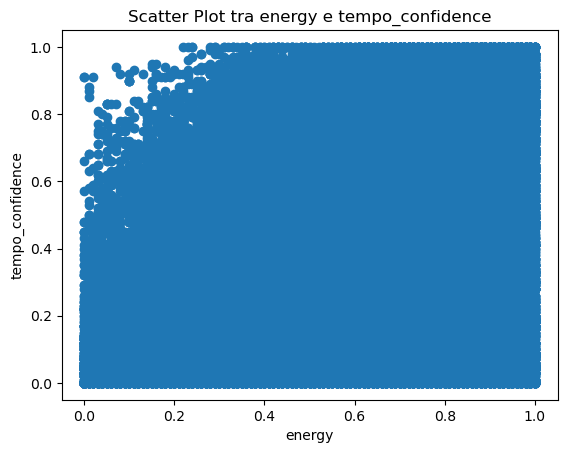

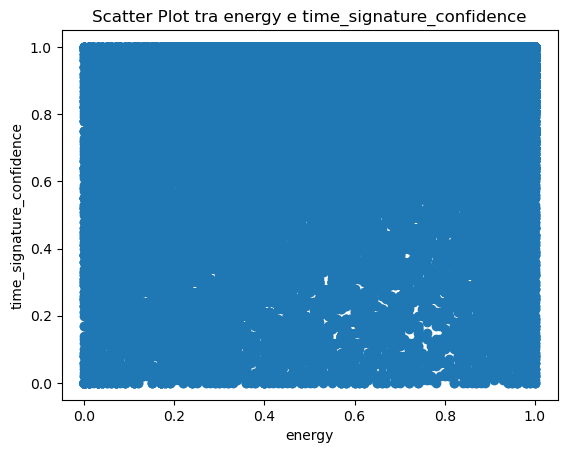

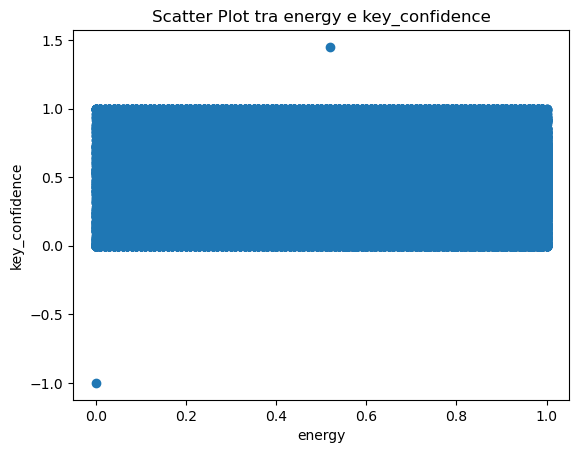

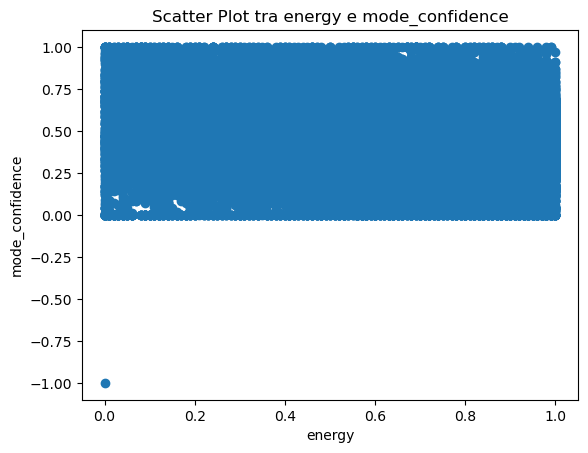

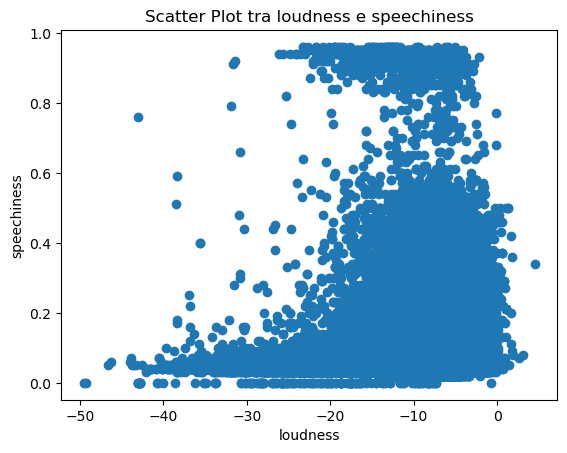

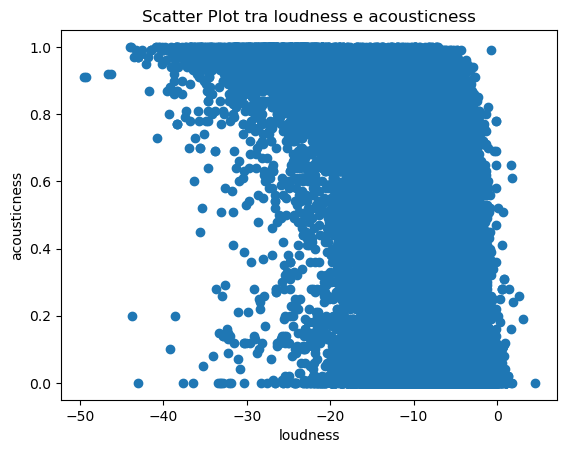

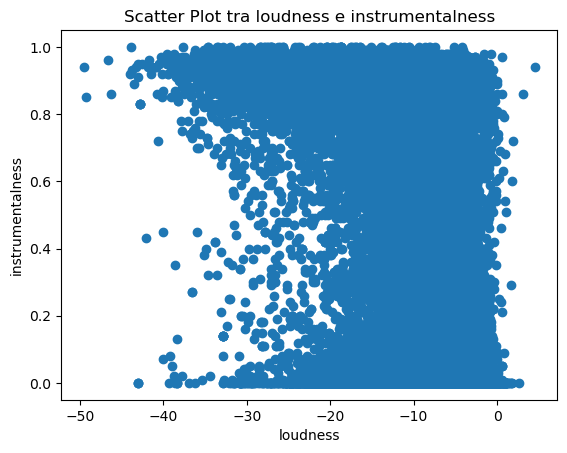

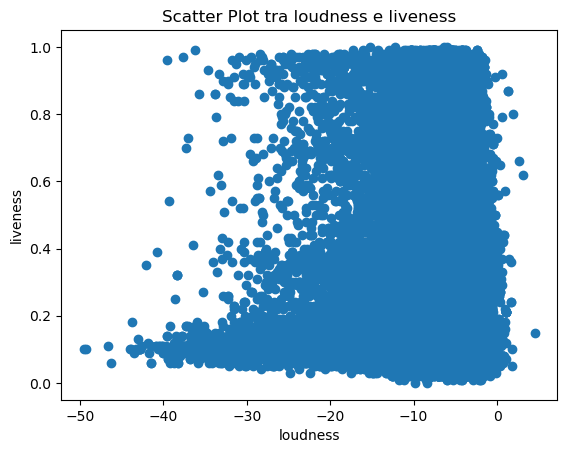

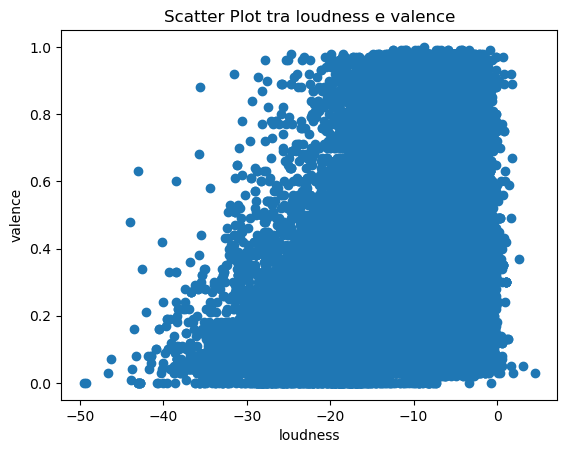

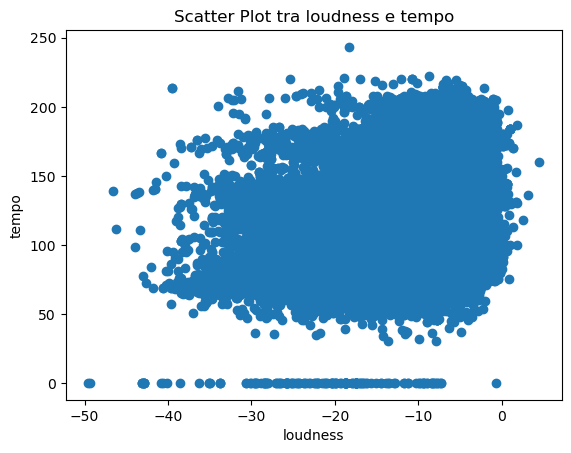

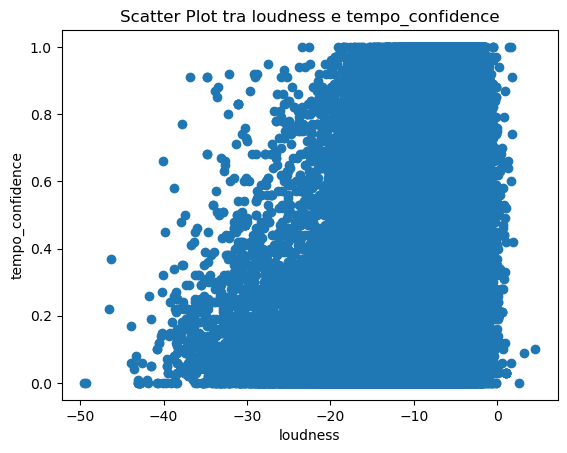

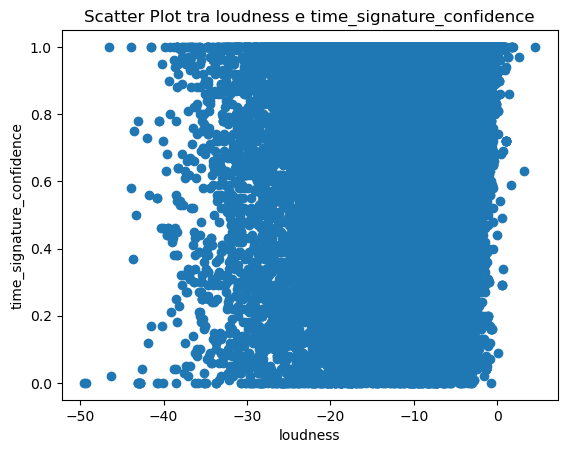

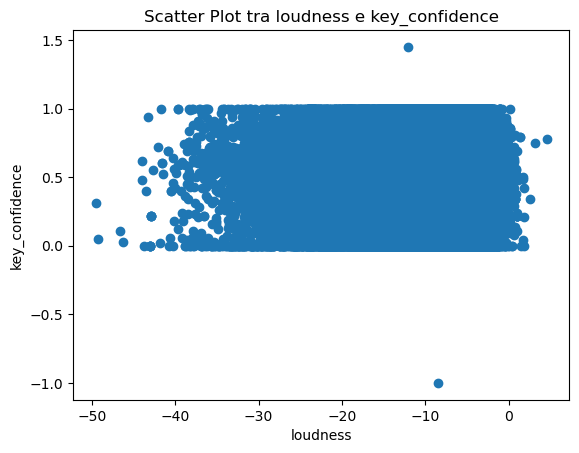

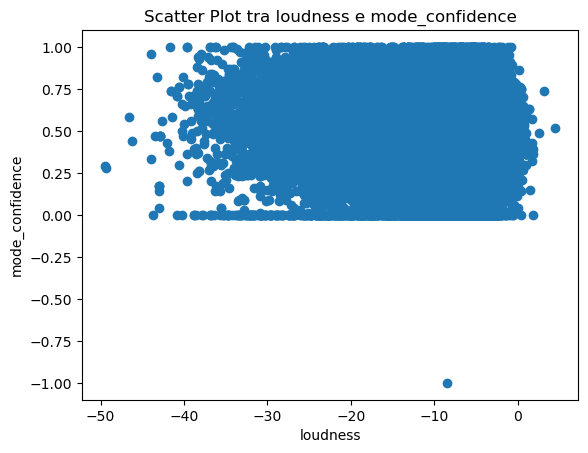

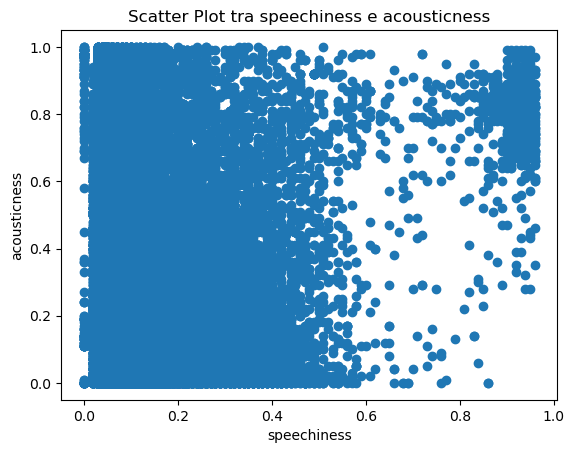

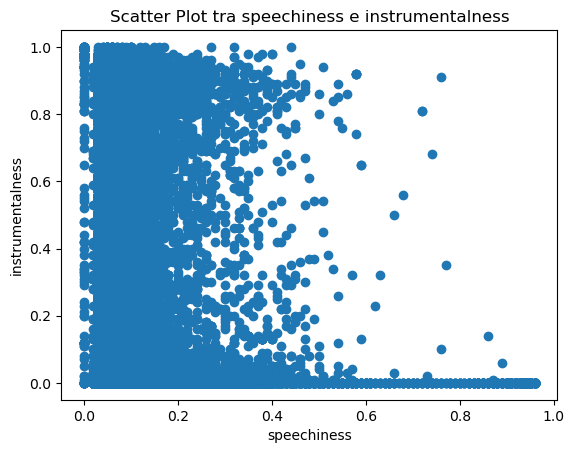

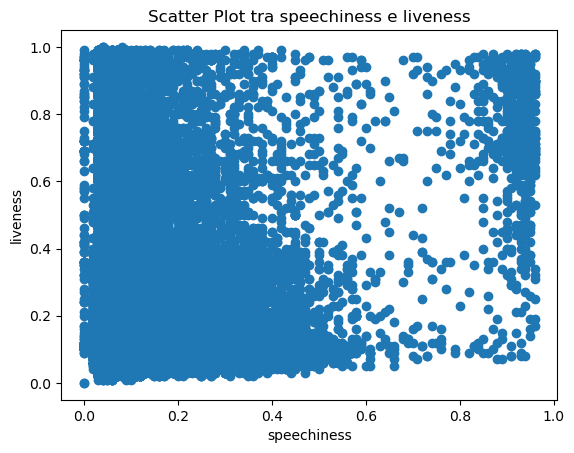

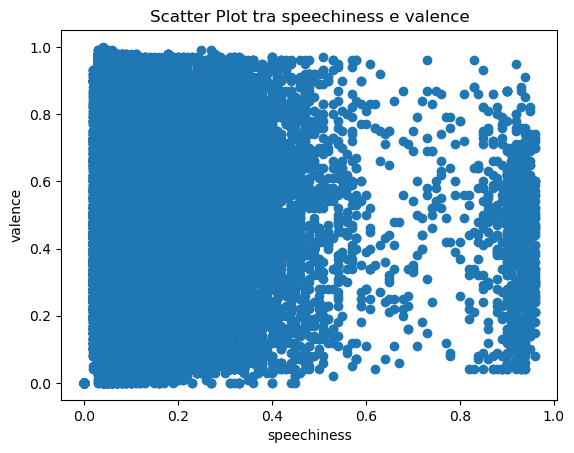

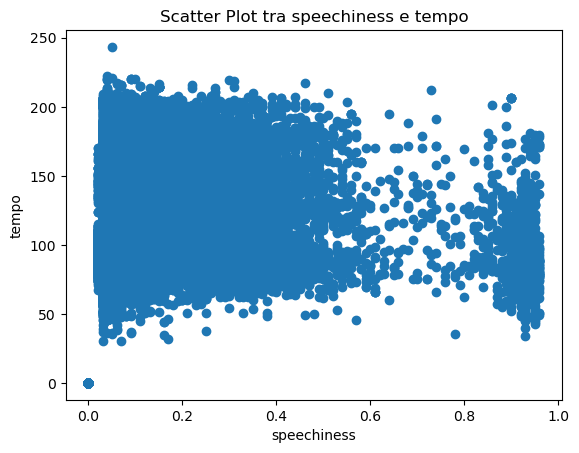

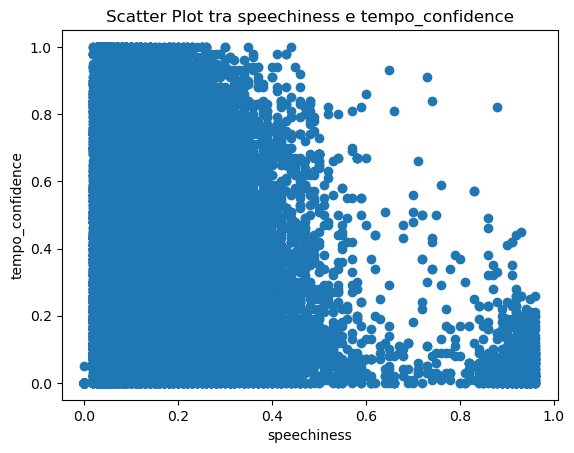

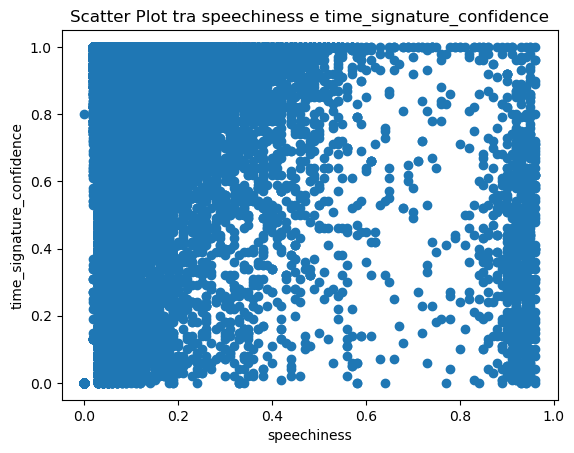

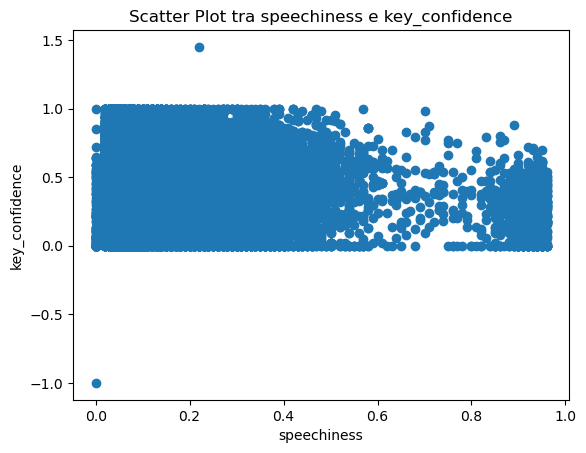

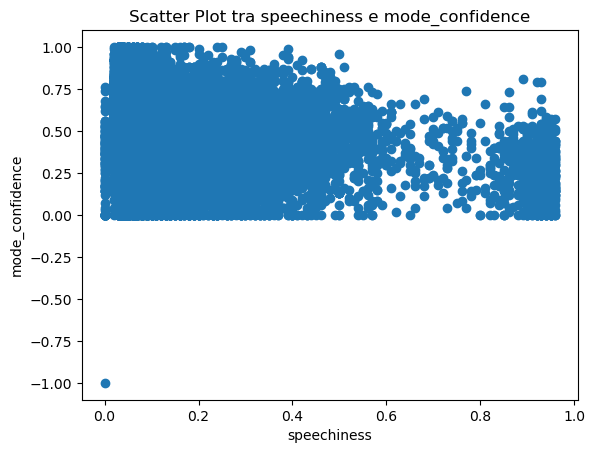

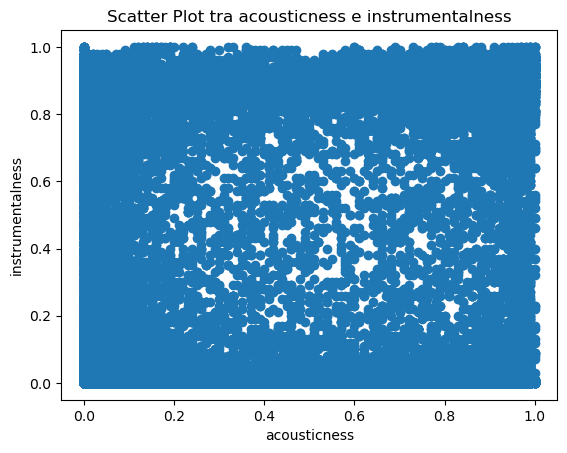

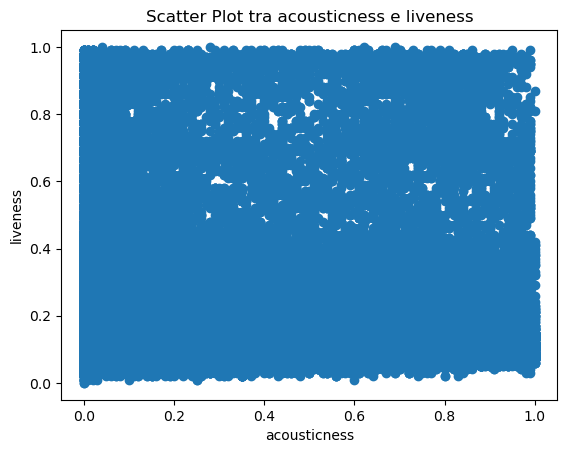

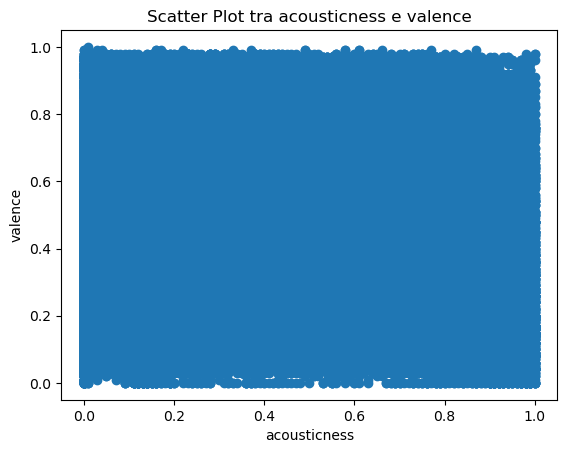

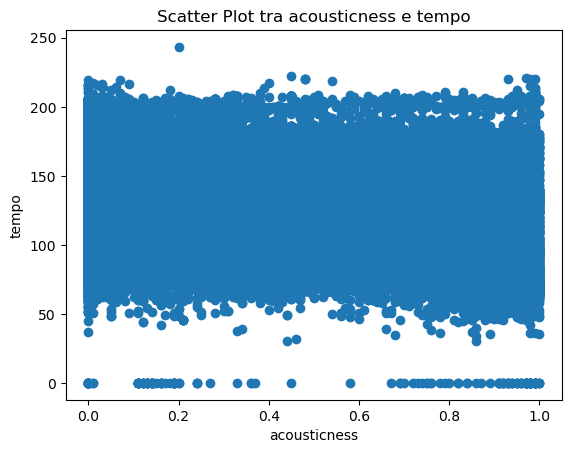

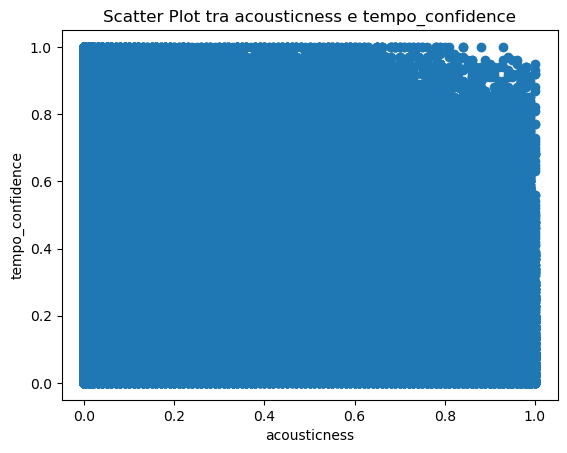

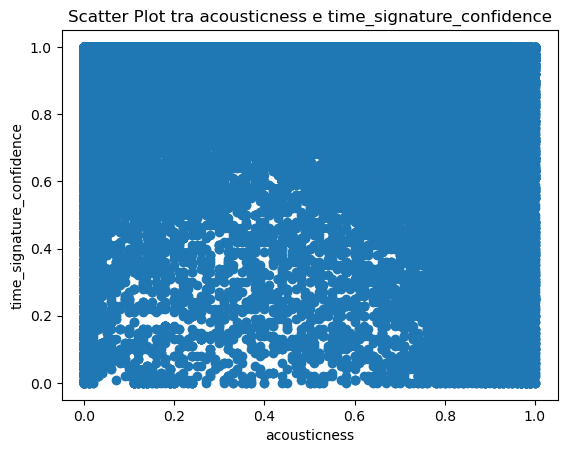

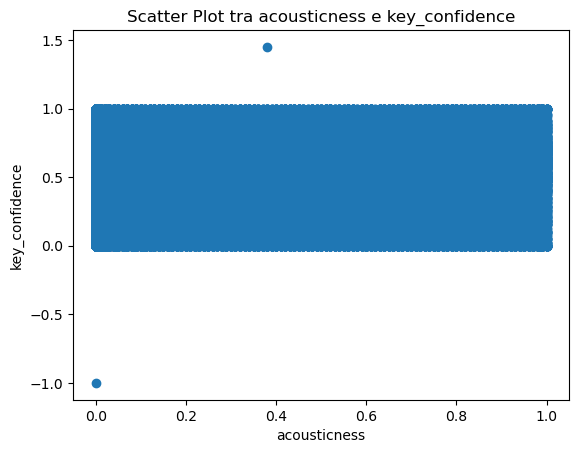

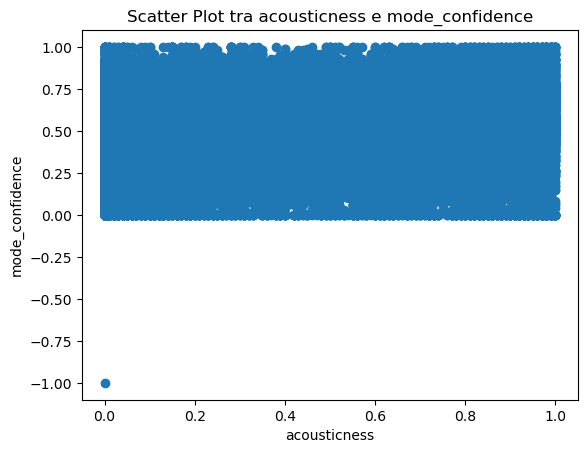

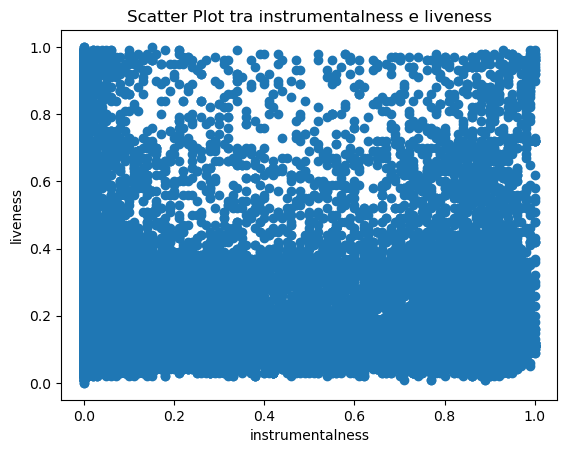

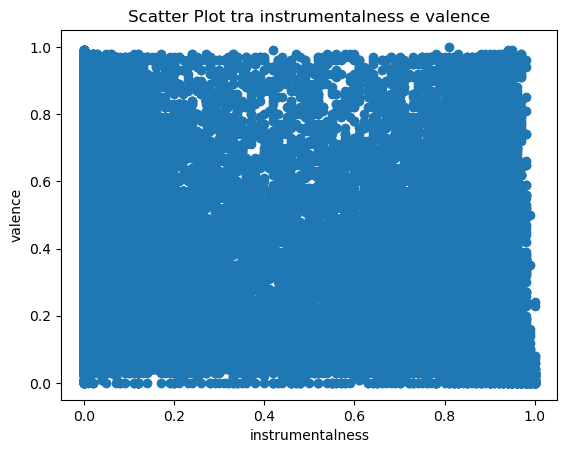

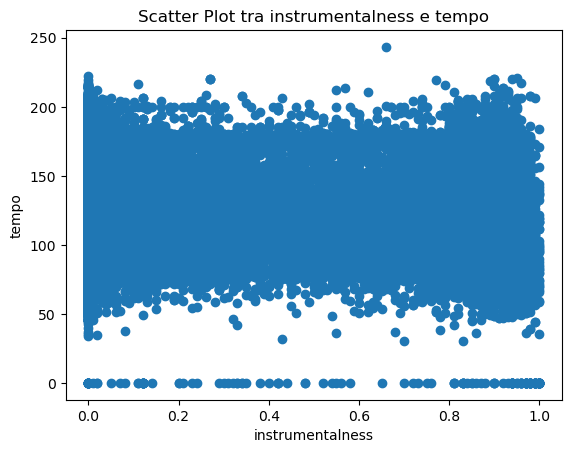

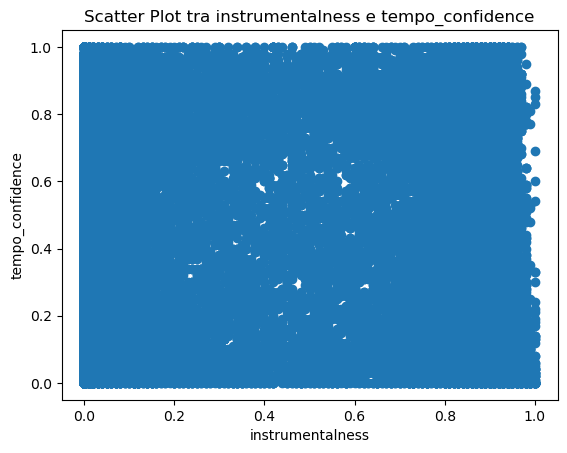

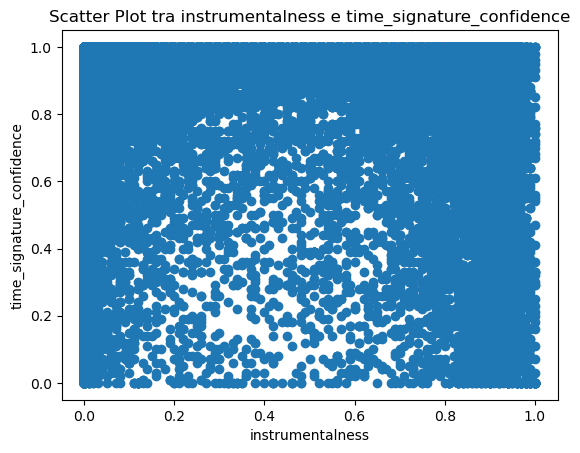

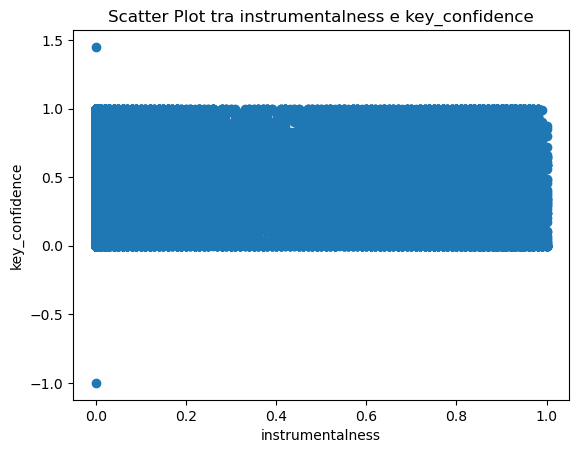

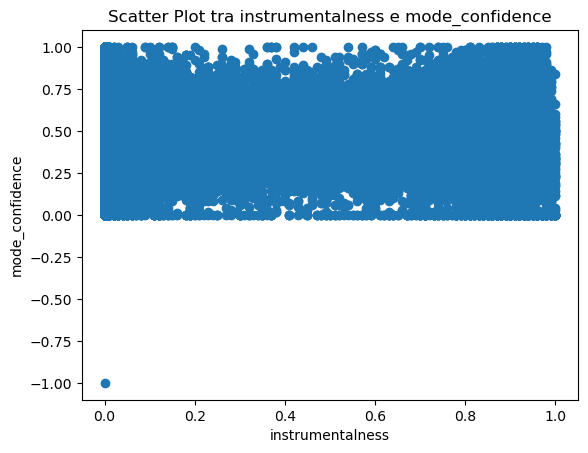

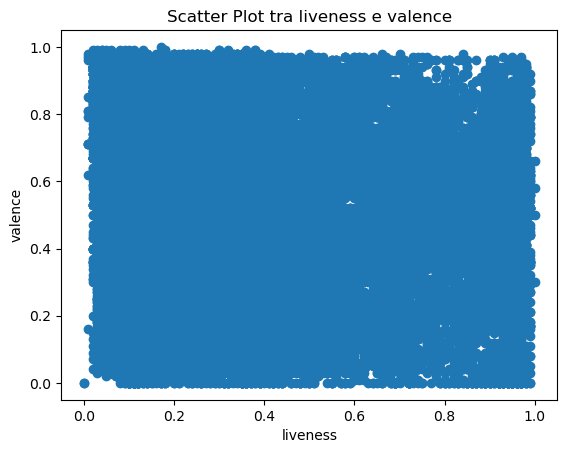

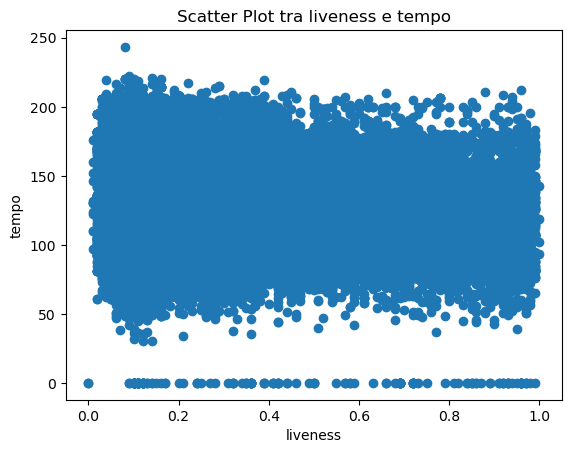

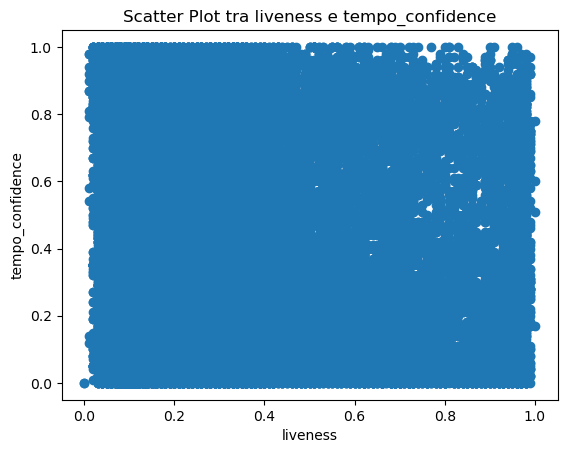

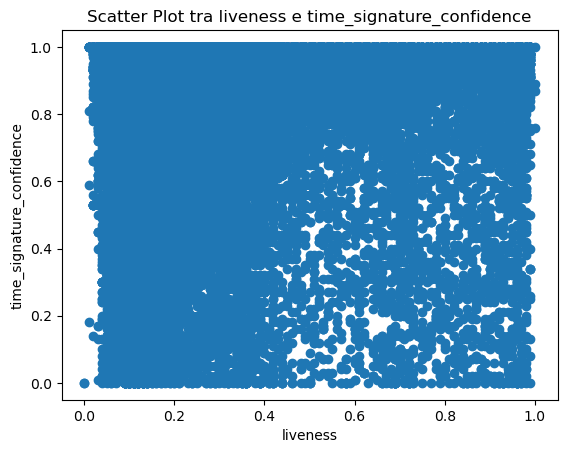

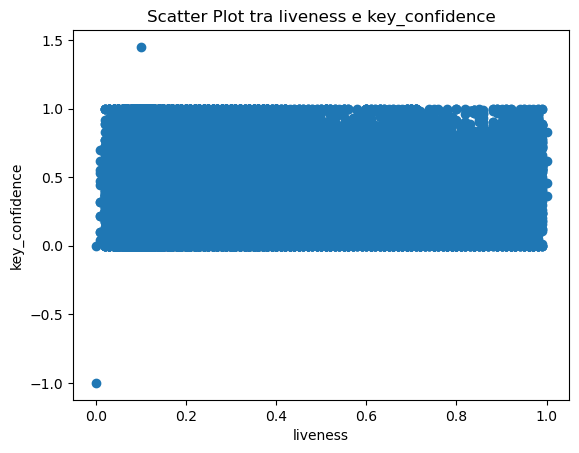

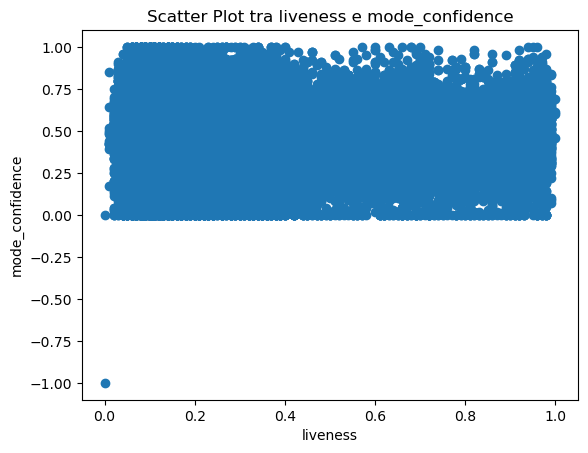

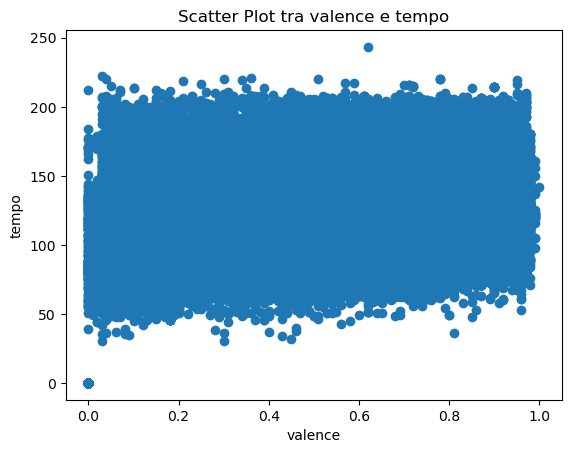

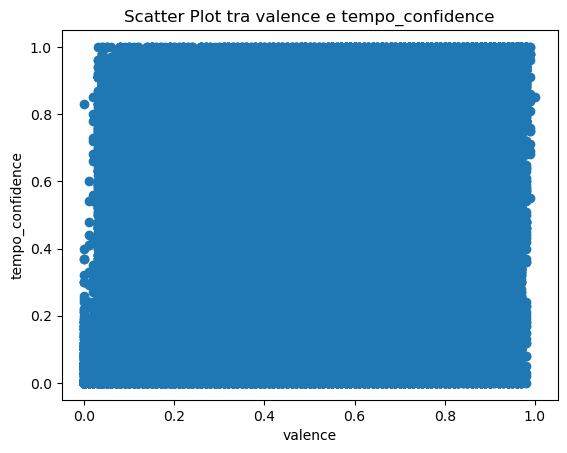

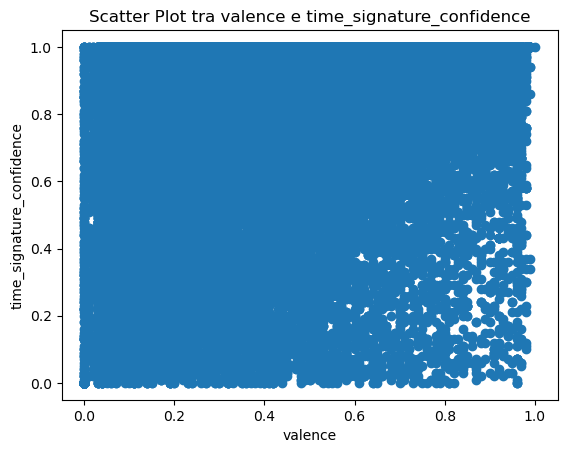

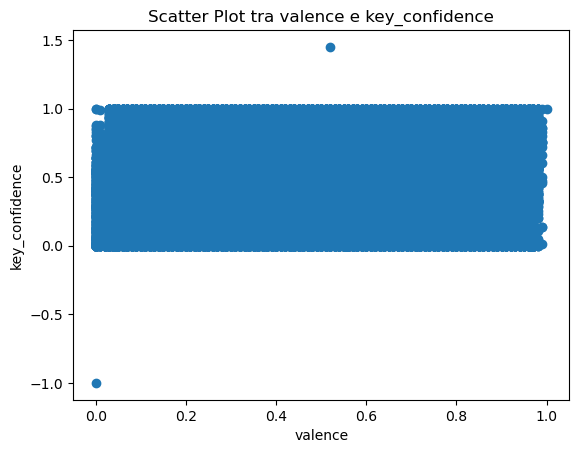

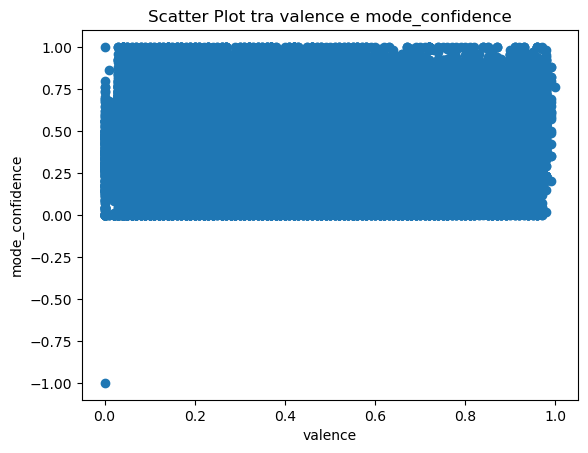

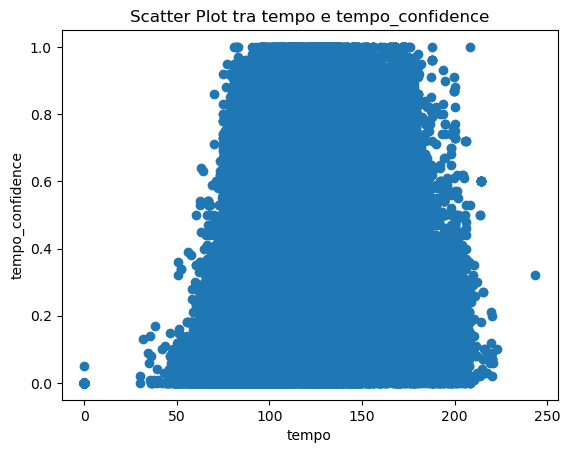

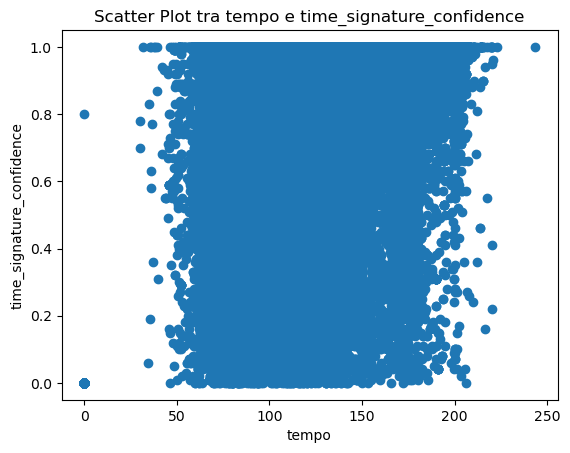

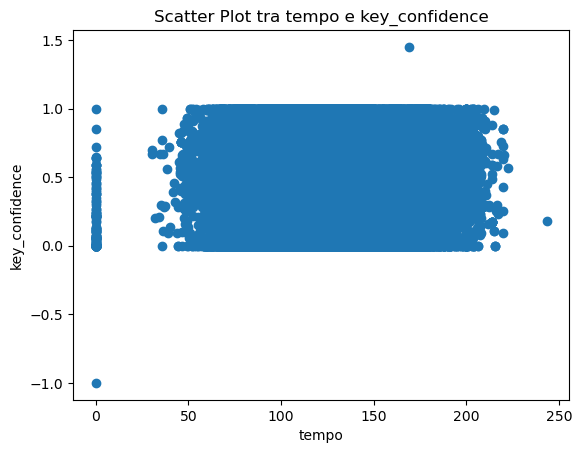

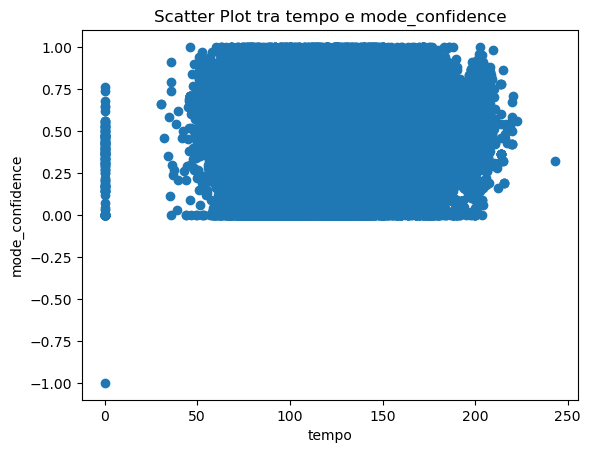

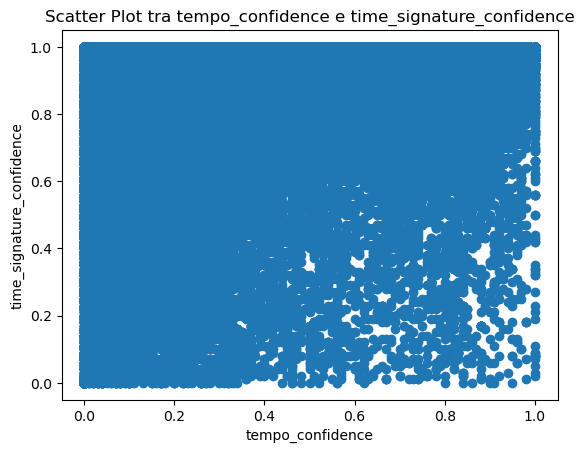

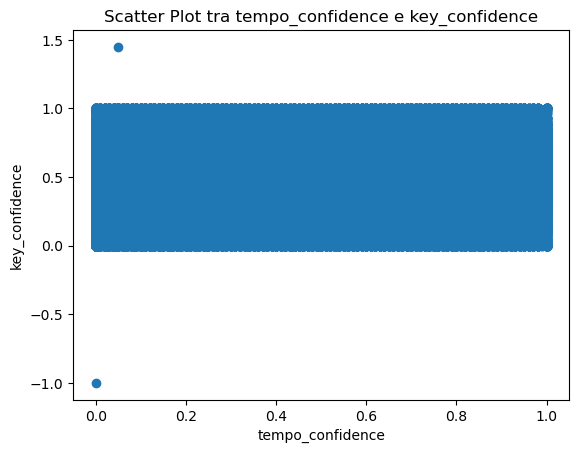

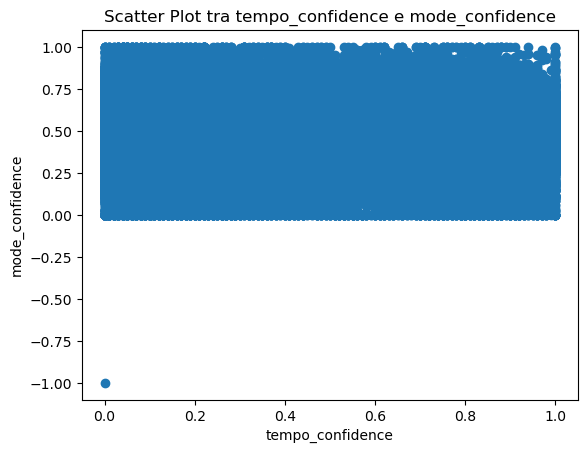

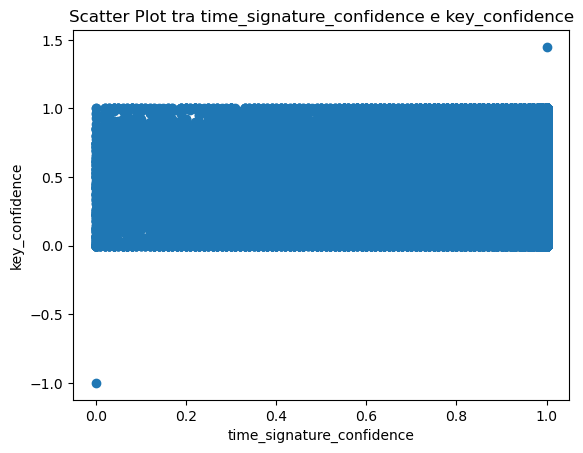

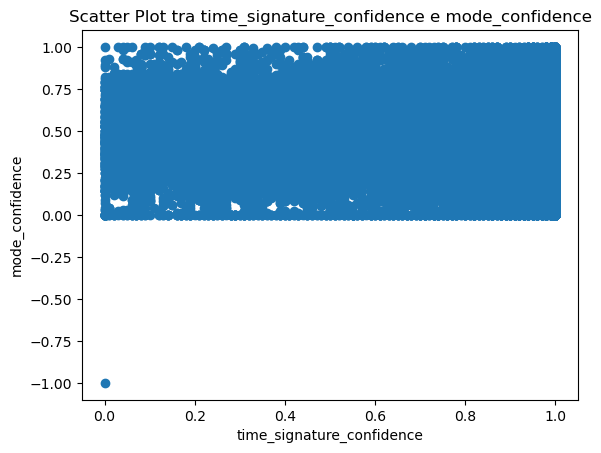

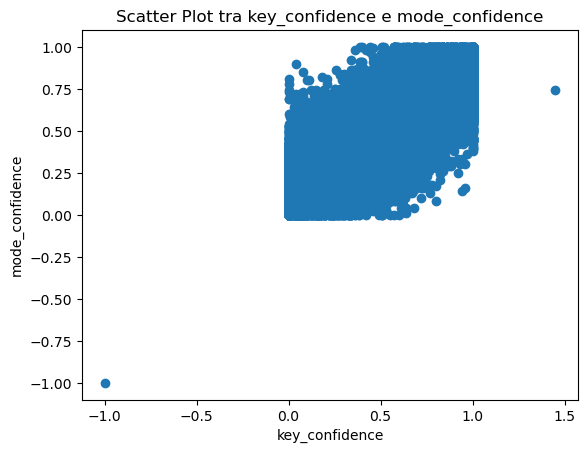

In [62]:
# Definire le variabili da visualizzare
variabili_da_visualizzare = list(df_continui.columns)

# Creare scatter plot per ogni combinazione di variabili
numero_di_variabili = len(variabili_da_visualizzare)

for i in range(numero_di_variabili):
    for j in range(i+1, numero_di_variabili):
        # Creare il plot
        plt.scatter(df_continui[variabili_da_visualizzare[i]], df_continui[variabili_da_visualizzare[j]])
        
        # Aggiungere etichette agli assi
        plt.xlabel(variabili_da_visualizzare[i])
        plt.ylabel(variabili_da_visualizzare[j])
        
        # Aggiungere un titolo
        plt.title(f"Scatter Plot tra {variabili_da_visualizzare[i]} e {variabili_da_visualizzare[j]}")
        
        # Mostrare il plot
        plt.show()

<AxesSubplot:>

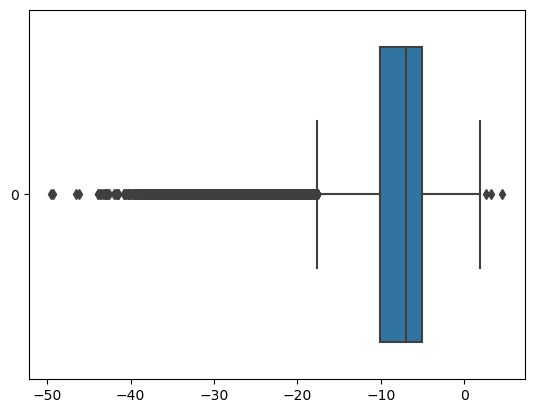

In [63]:
sns.boxplot(df["loudness"], orient="h")

<AxesSubplot:xlabel='loudness', ylabel='Count'>

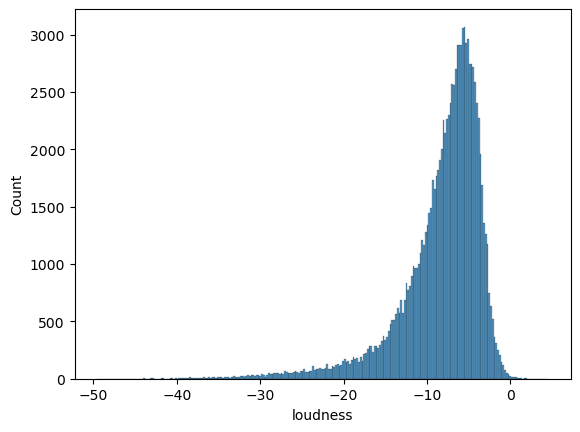

In [64]:
sns.histplot(df["loudness"])

##  Dataset sugli artisti

In [65]:
df_artist=pd.read_csv('tabular/artists.csv', skipinitialspace=True)

In [66]:
len(df_artist)

30141

In [67]:
df_artist

id                      name  popularity  \
0      19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0   
1      4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0   
2      0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0   
3      09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0   
4      0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0   
...                       ...                       ...         ...   
30136  2KjxvxgJvbwweNVRMSuIRG                     Hoang        49.0   
30137  6FPDULwgllPquFdqdzj5gi              Robin Hustin        45.0   
30138  7CSAJPH9eLCOvPc9jn1I6e                TobiMorrow        44.0   
30139  22lnnGKlaDxk8sfzCNRJuA                  Diviners        47.0   
30140  1v8lhkt5jZgHT8xi1wYNUS                 Philly K.        38.0   

       followers                                             genres  
0         9904.0  ['acid house', 'chicago house', 'chicago rap',...  
1        13047.0                 ['chicago house', 'classic house']  
2        11933.0   ['acid house', 'chicago house', 'classic house']  
3         4724.0                  ['chicago house', 'garage house']  
4        42515.0  ['chicago house', 'deep house', 'float house',...  
...          ...                                                ...  
30136    22134.0                                                 []  
30137    14198.0                        ['dutch edm', 'gaming edm']  
30138     2339.0                                       ['sky room']  
30139    74955.0                                     ['gaming edm']  
30140     2152.0                                                 []  

[30141 rows x 5 columns]

In [68]:
prima_riga_id_tracks=df['id'].loc[0]

In [69]:
prima_riga_id_tracks

'4rjA5kJJWbwU1prXCvg6Fk'

In [70]:
prima_riga_id_tracks==df_artist[['id']] # non c'è alcun tipo di corrispondenza

id
0      False
1      False
2      False
3      False
4      False
...      ...
30136  False
30137  False
30138  False
30139  False
30140  False

[30141 rows x 1 columns]

In [71]:
df

id                                        name  \
0       4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1       6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2       56tXgHlSHCfgmGhwVXNizc                                     Routine   
3       0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4       4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   
...                        ...                                         ...   
109542  0wiDjWz3U1WfwXSrWHXe2b     I'm Good (Blue) - REAPER Extended Remix   
109543  46n9OJc7LOIVdj8t2l5WA5                            End Of The Night   
109544  127uq83uGFapbddqiMUKky                     Sexy Bitch (feat. Akon)   
109545  0ZdUHFxifUJNqo7G4aJzoF                                    Savannah   
109546  0M4HcGtxIWVVH4rSNp6XhQ                                      Dejalo   

        disc_number  duration_ms  explicit  popularity  track_number  \
0               1.0       290.48     False        52.0           5.0   
1               1.0       539.23     False        45.0           5.0   
2               1.0       264.20     False        39.0           5.0   
3               1.0       387.41     False         0.0           6.0   
4               1.0       248.96     False         0.0           1.0   
...             ...          ...       ...         ...           ...   
109542          1.0       209.66      True        23.0           2.0   
109543          1.0       205.72      True        56.0           1.0   
109544          1.0       195.85      True        80.0           3.0   
109545          1.0       208.70     False        60.0           1.0   
109546          1.0       202.83     False        57.0           5.0   

                               artists   album_type  \
0                               Kölsch        album   
1                              Kiasmos        album   
2                      Joris Delacroix        album   
3               Pan-Pot;Anfisa Letyago       single   
4                Kollektiv Turmstrasse  compilation   
...                                ...          ...   
109542  David Guetta;Bebe Rexha;REAPER       single   
109543                     Danny Avila       single   
109544               David Guetta;Akon        album   
109545              Diviners;Philly K.       single   
109546                            King        album   

                            album_name  ... liveness valence   tempo  \
0                                 1989  ...     0.09    0.24  186.00   
1                              Kiasmos  ...     0.11    0.14  120.02   
2                        Night Visions  ...     0.07    0.32  118.05   
3                   Confronted Remixes  ...     0.11    0.04  128.99   
4                    10 Years Diynamic  ...     0.12    0.12  120.00   
...                                ...  ...      ...     ...     ...   
109542  I'm Good (Blue) [REAPER Remix]  ...     0.36    0.37  173.96   
109543                End Of The Night  ...     0.08    0.31   99.97   
109544                   One More Love  ...     0.13    0.80  130.01   
109545                        Savannah  ...     0.04    0.39  108.07   
109546                  Champagne Talk  ...     0.14    0.56   92.08   

        time_signature  tempo_confidence  time_signature_confidence  \
0                  3.0              0.02                       1.00   
1                  4.0              0.68                       0.33   
2                  3.0              0.85                       0.46   
3                  4.0              0.88                       0.50   
4                  4.0              0.88                       1.00   
...                ...               ...                        ...   
109542             4.0              0.73                       1.00   
109543             4.0              0.71                       1.00   
109544             4.0              0.81                     

## Nuovo dataset

In [72]:
df_artist['genres']=df_artist['genres'].values 

In [73]:
type(df_artist['genres'].values)

numpy.ndarray

In [74]:
df_artist.dtypes

id             object
name           object
popularity    float64
followers     float64
genres         object
dtype: object

In [75]:
len(df_artist)

30141

In [76]:
df_artist

id                      name  popularity  \
0      19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0   
1      4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0   
2      0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0   
3      09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0   
4      0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0   
...                       ...                       ...         ...   
30136  2KjxvxgJvbwweNVRMSuIRG                     Hoang        49.0   
30137  6FPDULwgllPquFdqdzj5gi              Robin Hustin        45.0   
30138  7CSAJPH9eLCOvPc9jn1I6e                TobiMorrow        44.0   
30139  22lnnGKlaDxk8sfzCNRJuA                  Diviners        47.0   
30140  1v8lhkt5jZgHT8xi1wYNUS                 Philly K.        38.0   

       followers                                             genres  
0         9904.0  ['acid house', 'chicago house', 'chicago rap',...  
1        13047.0                 ['chicago house', 'classic house']  
2        11933.0   ['acid house', 'chicago house', 'classic house']  
3         4724.0                  ['chicago house', 'garage house']  
4        42515.0  ['chicago house', 'deep house', 'float house',...  
...          ...                                                ...  
30136    22134.0                                                 []  
30137    14198.0                        ['dutch edm', 'gaming edm']  
30138     2339.0                                       ['sky room']  
30139    74955.0                                     ['gaming edm']  
30140     2152.0                                                 []  

[30141 rows x 5 columns]

In [77]:
len(df_artist)

30141

In [78]:
df_artist['genres'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
30136    False
30137    False
30138    False
30139    False
30140    False
Name: genres, Length: 30141, dtype: bool

## Creazione dizionario artisti

In [79]:
df_pop=df_artist[['name', 'popularity']] #colonne che riguardano il nome dell'artista e la popolarità

In [80]:
df[['artists']]

artists
0                               Kölsch
1                              Kiasmos
2                      Joris Delacroix
3               Pan-Pot;Anfisa Letyago
4                Kollektiv Turmstrasse
...                                ...
109542  David Guetta;Bebe Rexha;REAPER
109543                     Danny Avila
109544               David Guetta;Akon
109545              Diviners;Philly K.
109546                            King

[109149 rows x 1 columns]

In [81]:
righe_selezionate = df_pop[df_pop['name'] == 'Danny Avila']

# Stampa le righe selezionate
print(righe_selezionate) #media 82

              name  popularity
27149  Danny Avila        47.0


In [82]:
righe_selezionate = df_pop[df_pop['name'] == 'Tatiana']


print(righe_selezionate)

        name  popularity
143  Tatiana        50.0
175  Tatiana        15.0


In [83]:
righe_selezionate = df_pop[df_pop['name'] == 'Fast Eddie']


print(righe_selezionate)

         name  popularity
0  Fast Eddie        28.0


In [84]:
righe_selezionate = df_pop[df_pop['name'] == 'Malibu']


print(righe_selezionate)

        name  popularity
1558  Malibu        29.0
3097  Malibu        53.0


In [85]:
df_pop

name  popularity
0                    Fast Eddie        28.0
1                    Joe Smooth        38.0
2      Farley "Jackmaster" Funk        21.0
3                       Jomanda        20.0
4                     Floorplan        37.0
...                         ...         ...
30136                     Hoang        49.0
30137              Robin Hustin        45.0
30138                TobiMorrow        44.0
30139                  Diviners        47.0
30140                 Philly K.        38.0

[30141 rows x 2 columns]

In [86]:
lista_artisti=df_pop['name'].to_list()

In [87]:
len(lista_artisti)

30141

In [88]:
len(list(set(lista_artisti)))

29918

In [89]:
lista_iniziale=df_artist[['name', 'popularity']].values.tolist()

In [90]:
lista_iniziale

[['Fast Eddie', 28.0],
 ['Joe Smooth', 38.0],
 ['Farley "Jackmaster" Funk', 21.0],
 ['Jomanda', 20.0],
 ['Floorplan', 37.0],
 ['J.M. Silk', 7.0],
 ['Sampson Butch Moore', 0.0],
 ['Steve "Silk" Hurley', 34.0],
 ['Cosmic Gate', 51.0],
 ['Cajmere', 41.0],
 ['Dajae', 40.0],
 ['Marshall Jefferson', 50.0],
 ['George Smeddles', 38.0],
 ['Paris Brightledge', 24.0],
 ['Robert Owens', 32.0],
 ['Phuture', 21.0],
 ['DJ Pierre', 27.0],
 ['Chic Loren', 23.0],
 ['DJ Sneak', 25.0],
 ['Jungle Wonz', 7.0],
 ['Jamie Jones', 54.0],
 ['Maurice Joshua', 23.0],
 ['M. Terrel', 1.0],
 ['Armando', 21.0],
 ['Paul Johnson', 43.0],
 ['Mr. Lee', 19.0],
 ['Sounfx', 0.0],
 ['Will Clarke', 45.0],
 ['Ten City', 32.0],
 ['Fingers Inc.', 19.0],
 ['Tripmastaz', 13.0],
 ['RareTwo Inc.', 3.0],
 ['Steve Poindexter', 15.0],
 ['Free Magic', 20.0],
 ['Noosa Heads', 15.0],
 ['Frits Wentink', 25.0],
 ['Big Saldo', 0.0],
 ['Chantay Savage', 27.0],
 ['Jesse Perez', 20.0],
 ['KE', 20.0],
 ['Demuir', 26.0],
 ['Roy Davis Jr.', 36.0],


In [91]:
for i in lista_iniziale:
    if i[0]=='Janine':
        print(i)

['Janine', 48.0]
['Janine', 52.0]
['Janine', 2.0]


In [92]:
for i in lista_iniziale:
    print(i[0])

Fast Eddie
Joe Smooth
Farley "Jackmaster" Funk
Jomanda
Floorplan
J.M. Silk
Sampson Butch Moore
Steve "Silk" Hurley
Cosmic Gate
Cajmere
Dajae
Marshall Jefferson
George Smeddles
Paris Brightledge
Robert Owens
Phuture
DJ Pierre
Chic Loren
DJ Sneak
Jungle Wonz
Jamie Jones
Maurice Joshua
M. Terrel
Armando
Paul Johnson
Mr. Lee
Sounfx
Will Clarke
Ten City
Fingers Inc.
Tripmastaz
RareTwo Inc.
Steve Poindexter
Free Magic
Noosa Heads
Frits Wentink
Big Saldo
Chantay Savage
Jesse Perez
KE
Demuir
Roy Davis Jr.
Umosia
Russoul
Pierre's Pfantasy Club
J.R.
Gettoblaster
Robert Armani
Mark Grant
Walter Phillips
Glenn Underground
Chez Damier
Ron Trent
Khruangbin
Kevin Saunderson
Lee Foss
Bernard Badie
Tapesh
Los Suruba
DJ.B
Groove Assassin
Sean Ray
Illyus & Barrientos
Mr. Fingers
DJ Spen
Thommy Davis
Riva Starr
Emanuel Satie
Jean-Luc Ponty
Patrick Topping
Zoe Thorn
Supernova
Chris Carrier
JEFFK
Nouha Matlouni
Angel Alanis
DJ Deeon
Joeski
Tyree
Jeziel Quintela
Jovonn
DJ Deep
Ralphi Rosario
Aneeta Beat
Lind

In [93]:
duplicati = []
singoli = []
conteggio_elementi = {}


for i in lista_iniziale:
    nome = i[0]

    # Aggiorna il conteggio per il nome corrente
    if nome in conteggio_elementi:
        conteggio_elementi[nome] += 1
    else:
        conteggio_elementi[nome] = 1

# Ora che abbiamo completato il conteggio, possiamo decidere quali sono singoli e duplicati
for elemento, conteggio in conteggio_elementi.items():
    if conteggio == 1:
        singoli.append(elemento)
    else:
        duplicati.append(elemento)



In [94]:
singoli

['Fast Eddie',
 'Joe Smooth',
 'Farley "Jackmaster" Funk',
 'Jomanda',
 'Floorplan',
 'J.M. Silk',
 'Sampson Butch Moore',
 'Steve "Silk" Hurley',
 'Cosmic Gate',
 'Cajmere',
 'Dajae',
 'Marshall Jefferson',
 'George Smeddles',
 'Paris Brightledge',
 'Robert Owens',
 'Phuture',
 'DJ Pierre',
 'Chic Loren',
 'DJ Sneak',
 'Jungle Wonz',
 'Jamie Jones',
 'Maurice Joshua',
 'M. Terrel',
 'Armando',
 'Paul Johnson',
 'Mr. Lee',
 'Sounfx',
 'Will Clarke',
 'Ten City',
 'Fingers Inc.',
 'Tripmastaz',
 'RareTwo Inc.',
 'Steve Poindexter',
 'Free Magic',
 'Noosa Heads',
 'Frits Wentink',
 'Big Saldo',
 'Chantay Savage',
 'Jesse Perez',
 'KE',
 'Demuir',
 'Roy Davis Jr.',
 'Umosia',
 'Russoul',
 "Pierre's Pfantasy Club",
 'J.R.',
 'Gettoblaster',
 'Robert Armani',
 'Mark Grant',
 'Walter Phillips',
 'Glenn Underground',
 'Chez Damier',
 'Ron Trent',
 'Khruangbin',
 'Kevin Saunderson',
 'Lee Foss',
 'Bernard Badie',
 'Tapesh',
 'Los Suruba',
 'DJ.B',
 'Groove Assassin',
 'Sean Ray',
 'Illyus & Ba

In [95]:
duplicati

['Tatiana',
 'Sasha',
 'Wheels on the Bus',
 'Hush Little Baby',
 'Shiloh Dynasty',
 'Beowülf',
 'Chris James',
 'Janine',
 'Rahat Fateh Ali Khan',
 'Rocco',
 'Ebony',
 'Brandon',
 'Liniker',
 'Malibu',
 'Pyt Ny',
 'David Thomas',
 'Ian Dean',
 'Mango',
 'Péricles',
 'Tiee',
 'Gaab',
 'Michelle',
 'Carolina',
 'Frenzy',
 'Buddy',
 'Quetschn Academy',
 'Hannes',
 'Xandl',
 'Mr. C',
 'Sheba',
 'S. P. Sailaja',
 'KK',
 'Grey Skye Evans',
 'Heart',
 'Tristan',
 'Level',
 'Marley Carroll',
 'Plan B',
 'Divino',
 'Haze',
 'Randy',
 'MOSKA',
 'Fran C',
 'Juanka',
 'ThirumaLi',
 'SA',
 'MC Couper',
 'Teejay',
 'Kalla Sha',
 'Sayanora Philip',
 'MK',
 'Fran',
 'Ana Gabriela',
 'Otto',
 'Maze',
 'Netto',
 'Baby Sleep Sounds',
 'Meeresrauschen',
 'White Noise Baby Sleep',
 'Sleepy Times',
 'The Rain Library',
 'Nature Recordings',
 'Romy',
 'Soraya',
 'Dante',
 'Rosana',
 'Dorian',
 'Smartface',
 'Nostalgique',
 'King',
 'Medina',
 'Romy Wave',
 'Carola',
 'IMAN',
 'ABC',
 'Mirage',
 'Howard Jone

In [96]:
import numpy as np
dizionario_artisti={}
for d in singoli:
    for index, element  in enumerate(lista_iniziale):
        if d in element:
            dizionario_artisti[d]=element[1]

for g in duplicati:
    lista_doppi=[]
    for index, element in enumerate(lista_iniziale):
        if g in element:
            lista_doppi.append(element[1])
            dizionario_artisti[g]=round(np.max(lista_doppi), 2)

      
            
    
    

In [97]:
dizionario_artisti

{'Fast Eddie': 28.0,
 'Joe Smooth': 38.0,
 'Farley "Jackmaster" Funk': 21.0,
 'Jomanda': 20.0,
 'Floorplan': 37.0,
 'J.M. Silk': 7.0,
 'Sampson Butch Moore': 0.0,
 'Steve "Silk" Hurley': 34.0,
 'Cosmic Gate': 51.0,
 'Cajmere': 41.0,
 'Dajae': 40.0,
 'Marshall Jefferson': 50.0,
 'George Smeddles': 38.0,
 'Paris Brightledge': 24.0,
 'Robert Owens': 32.0,
 'Phuture': 21.0,
 'DJ Pierre': 27.0,
 'Chic Loren': 23.0,
 'DJ Sneak': 25.0,
 'Jungle Wonz': 7.0,
 'Jamie Jones': 54.0,
 'Maurice Joshua': 23.0,
 'M. Terrel': 1.0,
 'Armando': 21.0,
 'Paul Johnson': 43.0,
 'Mr. Lee': 19.0,
 'Sounfx': 0.0,
 'Will Clarke': 45.0,
 'Ten City': 32.0,
 'Fingers Inc.': 19.0,
 'Tripmastaz': 13.0,
 'RareTwo Inc.': 3.0,
 'Steve Poindexter': 15.0,
 'Free Magic': 20.0,
 'Noosa Heads': 15.0,
 'Frits Wentink': 25.0,
 'Big Saldo': 0.0,
 'Chantay Savage': 27.0,
 'Jesse Perez': 20.0,
 'KE': 20.0,
 'Demuir': 26.0,
 'Roy Davis Jr.': 36.0,
 'Umosia': 0.0,
 'Russoul': 14.0,
 "Pierre's Pfantasy Club": 9.0,
 'J.R.': 6.0,
 'Ge

In [98]:
dizionario_artisti['Malibu']#41

53.0

In [99]:
dizionario_artisti['Giuseppe Verdi'] #57

58.0

In [100]:
dizionario_artisti['BHZ']#64

64.0

In [101]:
dizionario_artisti['Janine']#52

52.0

In [102]:
righe_selezionate = df_pop[df_pop['name'] == 'Danny Avila']


print(righe_selezionate) #media 82

              name  popularity
27149  Danny Avila        47.0


In [103]:
righe_selezionate = df_pop[df_pop['name'] == 'Michelle']


print(righe_selezionate) # media 27

           name  popularity
3294   Michelle        52.0
28528  Michelle        22.0


In [104]:
len(df_artist)

30141

In [105]:
df_artist

id                      name  popularity  \
0      19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0   
1      4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0   
2      0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0   
3      09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0   
4      0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0   
...                       ...                       ...         ...   
30136  2KjxvxgJvbwweNVRMSuIRG                     Hoang        49.0   
30137  6FPDULwgllPquFdqdzj5gi              Robin Hustin        45.0   
30138  7CSAJPH9eLCOvPc9jn1I6e                TobiMorrow        44.0   
30139  22lnnGKlaDxk8sfzCNRJuA                  Diviners        47.0   
30140  1v8lhkt5jZgHT8xi1wYNUS                 Philly K.        38.0   

       followers                                             genres  
0         9904.0  ['acid house', 'chicago house', 'chicago rap',...  
1        13047.0                 ['chicago house', 'classic house']  
2        11933.0   ['acid house', 'chicago house', 'classic house']  
3         4724.0                  ['chicago house', 'garage house']  
4        42515.0  ['chicago house', 'deep house', 'float house',...  
...          ...                                                ...  
30136    22134.0                                                 []  
30137    14198.0                        ['dutch edm', 'gaming edm']  
30138     2339.0                                       ['sky room']  
30139    74955.0                                     ['gaming edm']  
30140     2152.0                                                 []  

[30141 rows x 5 columns]

##  INSERIMENTO NELLA TABELLA GENERICA

In [106]:
#df_copia=df.copy()

In [107]:
popularity_artist_column = []  

for index, row in df.iterrows():
    lista = []  
    if ';' in row['artists']:
        artisti = row['artists'].split(';')
        for i in artisti:
            if i in dizionario_artisti.keys():
                lista.append(dizionario_artisti[i])
    elif row['artists'] in dizionario_artisti.keys():
        lista = [dizionario_artisti[row['artists']]]
    else:
        lista = [0]  # Se non ci sono artisti nella lista, aggiungi uno 0
        print('vuoto', row['artists'])

    popularity_artist_column.append(lista)  

# Controllo e aggiunta di zeri per artisti senza popolarità
max_artisti = max(len(artists) for artists in popularity_artist_column)
for i in range(len(popularity_artist_column)):
    if not popularity_artist_column[i]:  # Se la lista è vuota, aggiungi zeri
        popularity_artist_column[i] = [0] * row['artists'].count(';')

df['popularity_artist'] = popularity_artist_column 


vuoto Vickeblanka
vuoto Vickeblanka
vuoto Vickeblanka
vuoto Vickeblanka
vuoto ReStarT
vuoto Patrick Brasca


In [108]:
df[['artists', 'popularity_artist']]

artists   popularity_artist
0                               Kölsch              [51.0]
1                              Kiasmos              [47.0]
2                      Joris Delacroix              [44.0]
3               Pan-Pot;Anfisa Letyago        [36.0, 40.0]
4                Kollektiv Turmstrasse              [45.0]
...                                ...                 ...
109542  David Guetta;Bebe Rexha;REAPER  [86.0, 79.0, 50.0]
109543                     Danny Avila              [47.0]
109544               David Guetta;Akon        [86.0, 79.0]
109545              Diviners;Philly K.        [47.0, 38.0]
109546                            King              [71.0]

[109149 rows x 2 columns]

In [109]:
len(df)

109149

## Dati relativi solo ai 20 generi 

In [110]:
df.to_csv('nuovo_dataset_totale.csv', index=False)

## TIME SERIES 

In [2]:
def load_npy(filename):
    return np.load(filename)

In [3]:
dir_path = 'time_series/'
len_threshold = 1280

In [4]:
#codice Fedele
X, y, ids = [], [], []

for file in os.listdir(dir_path):
    if os.path.splitext(file)[1] != '.npy': #loop su tutti i file 
        continue

    split = file.split("_")
    ids.append(split[0]) # track_id
    y.append(split[1][:-4]) # genre
    ts = load_npy(dir_path + file)
    
    if len(ts) > len_threshold: 
        ts = ts[0:len_threshold]
    else:
        # pad = [np.mean(ts[:-5])] * (len_threshold-len(ts)) # fill by mean value of last n observations
        pad = [ts[-1]] * (len_threshold-len(ts)) # fill with last observation 
        ts = np.append(ts, pad) 

    X.append([ts])

X, y, ids = np.array(X), np.array(y), np.array(ids) #li salvo come numpy array

In [5]:
X.shape

(10000, 1, 1280)

In [6]:
type(X)

numpy.ndarray

In [7]:
X

array([[[ 768.95392809,  828.02258438,  941.38630447, ...,
         1442.91478617, 1391.23601795, 1321.28390846]],

       [[3230.21111891, 3344.52008121, 3136.68604971, ...,
         1130.3803975 ,  978.28691948,  899.69898037]],

       [[2192.69421881, 1986.90485659, 2082.59886419, ...,
         3533.68370914, 3432.65255657, 3476.44208633]],

       ...,

       [[2744.44416673, 2714.7230879 , 2696.45324601, ...,
         3747.16287653, 3684.38455206, 3837.18621856]],

       [[1679.19150849, 1371.38211376, 1276.83064524, ...,
         1590.93902708, 1215.85383607, 1044.4196475 ]],

       [[1760.40333559, 1669.68354612, 1690.64028044, ...,
         2342.71927807, 3021.21525668, 3253.65964701]]])

In [8]:
#salvo i valori ottenuti
import numpy as np
import pandas as pd

# Assume che X, y e ids siano già definiti

# Salva i numpy array separatamente
np.save('X_finale.npy', X)
np.save('y_finale.npy', y)
np.save('ids_finale.npy', ids)



In [116]:
import numpy as np
import pandas as pd
X=np.load('X_finale.npy')
y=np.load('y_finale.npy')
ids=np.load('ids_finale.npy')

In [117]:
X.shape

(10000, 1, 1280)

In [118]:
y

array(['opera', 'minimal-techno', 'goth', ..., 'kids', 'kids', 'salsa'],
      dtype='<U17')

In [119]:
len(y)

10000

In [120]:
len(ids)

10000

In [121]:
ids

array(['3HUMNxBQoCPTg2K8wi7oFb', '0vgIkHFK8wpogVc1XCi18F',
       '0Av7W8Abdx761b2Ey5wo1u', ..., '7nvzIA270KiNDRWFbDFYtg',
       '54OrSbpVmumMYpo719UOtu', '7nP1xAbR6A5zyR7HFjuaDQ'], dtype='<U22')

In [122]:
X.shape

(10000, 1, 1280)

In [123]:
X[0][0][1]

828.0225843772006

In [124]:
# Reshape dell'array per renderlo 2D
array_2d = X.reshape(10000, 1280)

# Definiamo i nomi delle colonne
col_names = [f'Time_Series_{i}' for i in range(1280)]

# Convertiamo l'array 2D in un DataFrame di Pandas
dataset = pd.DataFrame(array_2d, columns=col_names)

# Stampiamo il dataset
dataset

Time_Series_0  Time_Series_1  Time_Series_2  Time_Series_3  \
0        768.953928     828.022584     941.386304     945.749554   
1       3230.211119    3344.520081    3136.686050    2845.915331   
2       2192.694219    1986.904857    2082.598864    2254.738538   
3       1050.270174    1122.238261    1176.087855    1132.076020   
4       2467.430056    2222.344861    2053.680022    1733.958104   
...             ...            ...            ...            ...   
9995    2548.124862    2546.788233    2649.905705    2659.042892   
9996    2228.440176    2254.232821    2708.213067    2628.270963   
9997    2744.444167    2714.723088    2696.453246    2946.824085   
9998    1679.191508    1371.382114    1276.830645    1667.736417   
9999    1760.403336    1669.683546    1690.640280    1952.964803   

      Time_Series_4  Time_Series_5  Time_Series_6  Time_Series_7  \
0       1159.725465    1240.333451    1423.674344    1634.191655   
1       2808.156723    2651.146880    2495.342218    2549.019959   
2       2401.683572    2407.616566    2217.455236    2091.153692   
3       1099.776970    1044.397110    1017.142440    1071.410733   
4       1115.226422     821.548505     964.249252    1550.314474   
...             ...            ...            ...            ...   
9995    2739.511966    2733.944363    2880.998890    2981.835024   
9996    2435.534537    2608.498513    2880.992403    3051.814048   
9997    3290.350700    3590.748661    3391.136867    2875.449961   
9998    1932.889145    1889.347707    1701.279505    1684.952873   
9999    2126.826974    2486.552860    3317.550259    3261.456137   

      Time_Series_8  Time_Series_9  ...  Time_Series_1270  Time_Series_1271  \
0       1828.503961    1847.519588  ...       1372.453429       1340.313921   
1       2661.295847    2727.635261  ...       2374.176941       2694.619211   
2       1957.757435    1862.646861  ...       2603.175943       3025.026862   
3       1101.055515    1114.730346  ...        929.248967        877.321930   
4       2235.348186    2176.156140  ...        696.200988        763.993678   
...             ...            ...  ...               ...               ...   
9995    3166.374133    3280.319527  ...       3035.211922       3029.181437   
9996    2945.827688    2689.657712  ...       2409.715359       2323.393471   
9997    3000.725993    3341.052924  ...       5752.789680       6206.808889   
9998    1677.765190    1429.459174  ...       4109.019682       2954.189607   
9999    2443.016478    1678.744322  ...       2533.390484       2080.200461   

      Time_Series_1272  Time_Series_1273  Time_Series_1274  Time_Series_1275  \
0          1279.665800       1360.056734       1444.307480       1517.640273   
1          3191.035809       2830.924961       2308.329541       1724.827512   
2          3222.103029       3303.188014       3347.910378       3343.393614   
3           859.559805        802.391176        798.260556        753.313485   
4          1417.110211       1939.536578       1798.345901       1245.512644   
...                ...               ...               ...               ...   
9995       2885.266212       2740.819521       2545.461249       2638.891888   
9996       2266.863656       2222.550753       2289.493743       2308.147315   
9997       5680.641287       3864.233246       3679.890839       3784.591377   
9998       2065.144493       2008.085378       1958.001344       1771.220881   
9999       2053.644090       2183.968921       2388.734401       2422.201706   

      Time_Series_1276  Time_Series_1277  Time_Series_1278  Time_Series_1279  
0          1458.297057       1442.914786       1391.236018       1321.283908  
1          1325.563666       1130.380398        978.286919        899.698980  
2          3378.469131       3533.683709       3432.652557       3476.442086  
3           770.064609        804.954898        839.047077        851.398559  
4          1079.249670       1005.486618        926.054992        9

In [125]:
dataset['ids']=ids
dataset['genres']=y

In [126]:
dataset


Time_Series_0  Time_Series_1  Time_Series_2  Time_Series_3  \
0        768.953928     828.022584     941.386304     945.749554   
1       3230.211119    3344.520081    3136.686050    2845.915331   
2       2192.694219    1986.904857    2082.598864    2254.738538   
3       1050.270174    1122.238261    1176.087855    1132.076020   
4       2467.430056    2222.344861    2053.680022    1733.958104   
...             ...            ...            ...            ...   
9995    2548.124862    2546.788233    2649.905705    2659.042892   
9996    2228.440176    2254.232821    2708.213067    2628.270963   
9997    2744.444167    2714.723088    2696.453246    2946.824085   
9998    1679.191508    1371.382114    1276.830645    1667.736417   
9999    1760.403336    1669.683546    1690.640280    1952.964803   

      Time_Series_4  Time_Series_5  Time_Series_6  Time_Series_7  \
0       1159.725465    1240.333451    1423.674344    1634.191655   
1       2808.156723    2651.146880    2495.342218    2549.019959   
2       2401.683572    2407.616566    2217.455236    2091.153692   
3       1099.776970    1044.397110    1017.142440    1071.410733   
4       1115.226422     821.548505     964.249252    1550.314474   
...             ...            ...            ...            ...   
9995    2739.511966    2733.944363    2880.998890    2981.835024   
9996    2435.534537    2608.498513    2880.992403    3051.814048   
9997    3290.350700    3590.748661    3391.136867    2875.449961   
9998    1932.889145    1889.347707    1701.279505    1684.952873   
9999    2126.826974    2486.552860    3317.550259    3261.456137   

      Time_Series_8  Time_Series_9  ...  Time_Series_1272  Time_Series_1273  \
0       1828.503961    1847.519588  ...       1279.665800       1360.056734   
1       2661.295847    2727.635261  ...       3191.035809       2830.924961   
2       1957.757435    1862.646861  ...       3222.103029       3303.188014   
3       1101.055515    1114.730346  ...        859.559805        802.391176   
4       2235.348186    2176.156140  ...       1417.110211       1939.536578   
...             ...            ...  ...               ...               ...   
9995    3166.374133    3280.319527  ...       2885.266212       2740.819521   
9996    2945.827688    2689.657712  ...       2266.863656       2222.550753   
9997    3000.725993    3341.052924  ...       5680.641287       3864.233246   
9998    1677.765190    1429.459174  ...       2065.144493       2008.085378   
9999    2443.016478    1678.744322  ...       2053.644090       2183.968921   

      Time_Series_1274  Time_Series_1275  Time_Series_1276  Time_Series_1277  \
0          1444.307480       1517.640273       1458.297057       1442.914786   
1          2308.329541       1724.827512       1325.563666       1130.380398   
2          3347.910378       3343.393614       3378.469131       3533.683709   
3           798.260556        753.313485        770.064609        804.954898   
4          1798.345901       1245.512644       1079.249670       1005.486618   
...                ...               ...               ...               ...   
9995       2545.461249       2638.891888       2936.289554       2917.328360   
9996       2289.493743       2308.147315       2370.018721       2399.885699   
9997       3679.890839       3784.591377       3828.972870       3747.162877   
9998       1958.001344       1771.220881       1758.607273       1590.939027   
9999       2388.734401       2422.201706       2375.613124       2342.719278   

      Time_Series_1278  Time_Series_1279                     ids  \
0          1391.236018       1321.283908  3HUMNxBQoCPTg2K8wi7oFb   
1           978.286919        899.698980  0vgIkHFK8wpogVc1XCi18F   
2          3432.652557       3476.442086  0Av7W8Abdx761b2Ey5wo1u   
3           839.047077        851.398559  5KIuAOpwX3UHISVwuBhG2J   
4           926.054992        964.566937  1e6YswGTpMvjk21TQAxfXw   
...                ...               ...              

In [127]:
X


array([[[ 768.95392809,  828.02258438,  941.38630447, ...,
         1442.91478617, 1391.23601795, 1321.28390846]],

       [[3230.21111891, 3344.52008121, 3136.68604971, ...,
         1130.3803975 ,  978.28691948,  899.69898037]],

       [[2192.69421881, 1986.90485659, 2082.59886419, ...,
         3533.68370914, 3432.65255657, 3476.44208633]],

       ...,

       [[2744.44416673, 2714.7230879 , 2696.45324601, ...,
         3747.16287653, 3684.38455206, 3837.18621856]],

       [[1679.19150849, 1371.38211376, 1276.83064524, ...,
         1590.93902708, 1215.85383607, 1044.4196475 ]],

       [[1760.40333559, 1669.68354612, 1690.64028044, ...,
         2342.71927807, 3021.21525668, 3253.65964701]]])

In [128]:
#time_series_originale.shape

In [129]:
#c=(X==time_series_originale).all()

In [36]:
c

True

In [130]:
dataset.to_csv('dataset_time_series.csv', index=False)

In [131]:
df.columns

Index(['id', 'name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_bars', 'genre', 'popularity_artist'],
      dtype='object')

In [132]:
dataset.columns

Index(['Time_Series_0', 'Time_Series_1', 'Time_Series_2', 'Time_Series_3',
       'Time_Series_4', 'Time_Series_5', 'Time_Series_6', 'Time_Series_7',
       'Time_Series_8', 'Time_Series_9',
       ...
       'Time_Series_1272', 'Time_Series_1273', 'Time_Series_1274',
       'Time_Series_1275', 'Time_Series_1276', 'Time_Series_1277',
       'Time_Series_1278', 'Time_Series_1279', 'ids', 'genres'],
      dtype='object', length=1282)

In [134]:
merged_df = dataset.merge(df, left_on="ids", right_on="id", how="inner")

In [135]:
merged_df

Time_Series_0  Time_Series_1  Time_Series_2  Time_Series_3  \
0         768.953928     828.022584     941.386304     945.749554   
1        3230.211119    3344.520081    3136.686050    2845.915331   
2        3230.211119    3344.520081    3136.686050    2845.915331   
3        2192.694219    1986.904857    2082.598864    2254.738538   
4        1050.270174    1122.238261    1176.087855    1132.076020   
...              ...            ...            ...            ...   
13202    2228.440176    2254.232821    2708.213067    2628.270963   
13203    2228.440176    2254.232821    2708.213067    2628.270963   
13204    2744.444167    2714.723088    2696.453246    2946.824085   
13205    1679.191508    1371.382114    1276.830645    1667.736417   
13206    1760.403336    1669.683546    1690.640280    1952.964803   

       Time_Series_4  Time_Series_5  Time_Series_6  Time_Series_7  \
0        1159.725465    1240.333451    1423.674344    1634.191655   
1        2808.156723    2651.146880    2495.342218    2549.019959   
2        2808.156723    2651.146880    2495.342218    2549.019959   
3        2401.683572    2407.616566    2217.455236    2091.153692   
4        1099.776970    1044.397110    1017.142440    1071.410733   
...              ...            ...            ...            ...   
13202    2435.534537    2608.498513    2880.992403    3051.814048   
13203    2435.534537    2608.498513    2880.992403    3051.814048   
13204    3290.350700    3590.748661    3391.136867    2875.449961   
13205    1932.889145    1889.347707    1701.279505    1684.952873   
13206    2126.826974    2486.552860    3317.550259    3261.456137   

       Time_Series_8  Time_Series_9  ...  valence   tempo  time_signature  \
0        1828.503961    1847.519588  ...     0.11   85.24             5.0   
1        2661.295847    2727.635261  ...     0.18  120.00             4.0   
2        2661.295847    2727.635261  ...     0.18  120.00             4.0   
3        1957.757435    1862.646861  ...     0.30  121.73             4.0   
4        1101.055515    1114.730346  ...     0.07   65.63             4.0   
...              ...            ...  ...      ...     ...             ...   
13202    2945.827688    2689.657712  ...     0.32  169.62             4.0   
13203    2945.827688    2689.657712  ...     0.32  169.62             4.0   
13204    3000.725993    3341.052924  ...     0.38   74.96             4.0   
13205    1677.765190    1429.459174  ...     0.43  113.08             4.0   
13206    2443.016478    1678.744322  ...     0.90   91.74             4.0   

       tempo_confidence  time_signature_confidence  key_confidence  \
0                  0.04                       0.02            0.53   
1                  0.70                       0.60            1.00   
2                  0.70                       0.60            1.00   
3                  0.75                       0.99            0.00   
4                  0.03                       0.42            0.69   
...                 ...                        ...             ...   
13202              0.13                       1.00            0.68   
13203              0.13                       1.00            0.68   
13204              0.07                       1.00            0.15   
13205              0.93                       0.99            0.62   
13206              0.88                       1.00            0.53   

       mode_confidence  n_bars              genre         popularity_artist  
0                 0.53    78.0              opera  [58.0, 52.0, 60.0, 48.0]  
1                 0.96   112.0     minimal-techno              [56.0, 62.0]  
2                 0.96   112.0             techno              [56.0, 62.0]  
3                 0.23   121.0               goth              [41.0, 19.0]  
4                 0.67    69.0              opera        [56.0, 45.0, 45.0]  
...                ...     ...                ...                       ...  
13202             0.53   148.0       

In [136]:
merged_df.to_csv('dataset_finale_timeseries.csv', index=False)